#House Prices - Advanced Regression Techniques
##Predict sales prices and practice feature engineering, RFs, and gradient boosting

import libraries and data loading from Kaggle "house-prices-advanced-regression-techniques"
and loading data

In [1101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

from google.colab import drive
drive.mount('/content/gdrive')
# main_path = '/content/gdrive/Othercomputers/ה-מחשב נייד שלי/תואר שני/הסקה סטטיסטית וכריית נתונים/Assignments/HW2/Kaggle - House Prices/house-prices-advanced-regression-techniques'
main_path = '/content/gdrive/MyDrive/Statistical_Data_Mining/Assignment_2/house-prices-advanced-regression-techniques' 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1102]:
train = pd.read_csv(main_path + '/train.csv')
test = pd.read_csv(main_path + '/test.csv')
submit = pd.read_csv(main_path + "/sample_submission.csv")

# Section 1: Database Overview and Visualization

In this section we will overview the database, understand it structure.

## 1.1 Data discription

We will make new database 'house_df' that is the concatinate of the test and train so wi can remove or add features to all the frames conveniently

In [1103]:
print("train database:")
train

train database:


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [1104]:
print("test database:")
test

test database:


Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

In [1105]:
house_df = pd.concat([train,test],ignore_index = True, sort = False)
tr_idx = house_df['SalePrice'].notnull() ## display data with on
te_idx = [not elem for elem in tr_idx]
te_idx = pd.Series(te_idx)
print("house dataframe shape:{}".format(house_df.shape))

house dataframe shape:(2919, 81)


In [1106]:
train

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [1107]:
house_df[tr_idx]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal  208500.0
1        2          20       RL  ...        WD         Normal  181500.0
2        3          60       RL  ...        WD         Normal  223500.0
3        4          70       RL  ...        WD        Abnorml  140000.0
4        5          60       RL  ...        WD         Normal  250000.0
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal  175000.0
1456  1457          20       RL  ...        WD         Normal  210000.0
1457  1458          70       RL  ...        WD         Normal  266500.0
1458  1459          20       RL  ...        WD         Normal  142125.0
1459  1460          20       RL  ...        WD         Normal  147500.0

[1460 rows x 81 columns]

## 1.2 Missing featurs

There are X fearute which dosent comprised from all samples in the dataframe:
* LotFrontage
* Alley
* BsmtQual
* MasVnrArea
* MasVnrArea
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Electrical
* FireplaceQu     
* GarageType                                                           
* GarageCond       
* PoolQC         
* Fence          
* MiscFeature    

Train and Test missing data:

In [1108]:
# house_df missing features
print("house_df missing features")
print("house_df shape: {}".format(train.shape))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(house_df.isna().sum())
missing_data_prec = missing_data/house_df.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

house_df missing features
house_df shape: (1460, 81)
               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               4    0.137033
LotFrontage          486   16.649538
LotArea                0    0.000000
Street                 0    0.000000
Alley               2721   93.216855
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              2    0.068517
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            1    0.034258
Exterior2nd           

Train missing data:

In [1109]:
# train missing features
print('train missing features')
print('train shape: {}'.format(train.shape[0]))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(train.isna().sum())
missing_data_prec = missing_data/train.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

train missing features
train shape: 1460
               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               0    0.000000
LotFrontage          259   17.739726
LotArea                0    0.000000
Street                 0    0.000000
Alley               1369   93.767123
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              0    0.000000
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            0    0.000000
Exterior2nd            0    0.0000

***Most missing features are:***
1.   "Alley" with 93% of missing values
2.   "PoolQC" with 99.52% of missing values
3.   "Fence" with 80.75% of missing values
4.   "MiscFeature" with 96.3% of missing values




## 1.3 Features type distribution

There are 81 diffrent feature, that is a lot of data to handle and process. Additionally, the feature are in diffrent type, not all of them are numerical, they can be splited according to type: 
1. int - 43 features
2. float64 - 25 features
3. object - 12 features

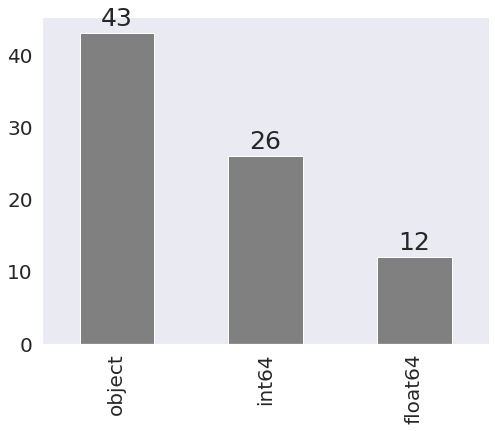

In [1110]:
plt.figure(figsize = (8,6))
ax = house_df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()

Statistical description of the numerical features

In [1111]:
# Amit: I think this part irellevent duo to lack of normalization step. It would be better if we normalize and reference this subsection 
house_df.describe().T.style.set_properties(**{'background-color': 'Grey',
                           'color': 'white',
                           'border-color': 'darkblack'})

## 1.4 Feature Histogram

Spliting the data according to the type from the previous subsection and ploting hitsograme for every feature to further understanding the numerical meaning behind the features.
It can be conclude from the histogram that:

1. **float64 features:**

  Three float64 features are in fact discrete variables:
  * BsmtHalfBath - Basement half bathrooms
  * BsmtFullBath - Basement full bathrooms
  * GarageCars - Size of garage in car capacity
  
  Some features have a skewed shape to one side.


2. **int features:**

  Five int features values does not represent quantitative sizes
  * MSSubClass - Identifies the type of dwelling involved in the sale.
  * YearBuilt - Original construction date
  * YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
  * MoSold - Month Sold (MM)
  * YrSold - Year Sold (YYYY)



In [1112]:
# Select categorical columns
categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 200 and 
                    house_df[cname].dtype == "object"]

print("Number of Categorical fetures:",(len(categorical_cols)))
# Select numerical columns
int_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['int64']]
    
print("Number of integer fetures:",(len(int_cols)))

float_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['float64']]
print("Number of float fetures:",(len(float_cols)))


Number of Categorical fetures: 43
Number of integer fetures: 26
Number of float fetures: 11


int type features:


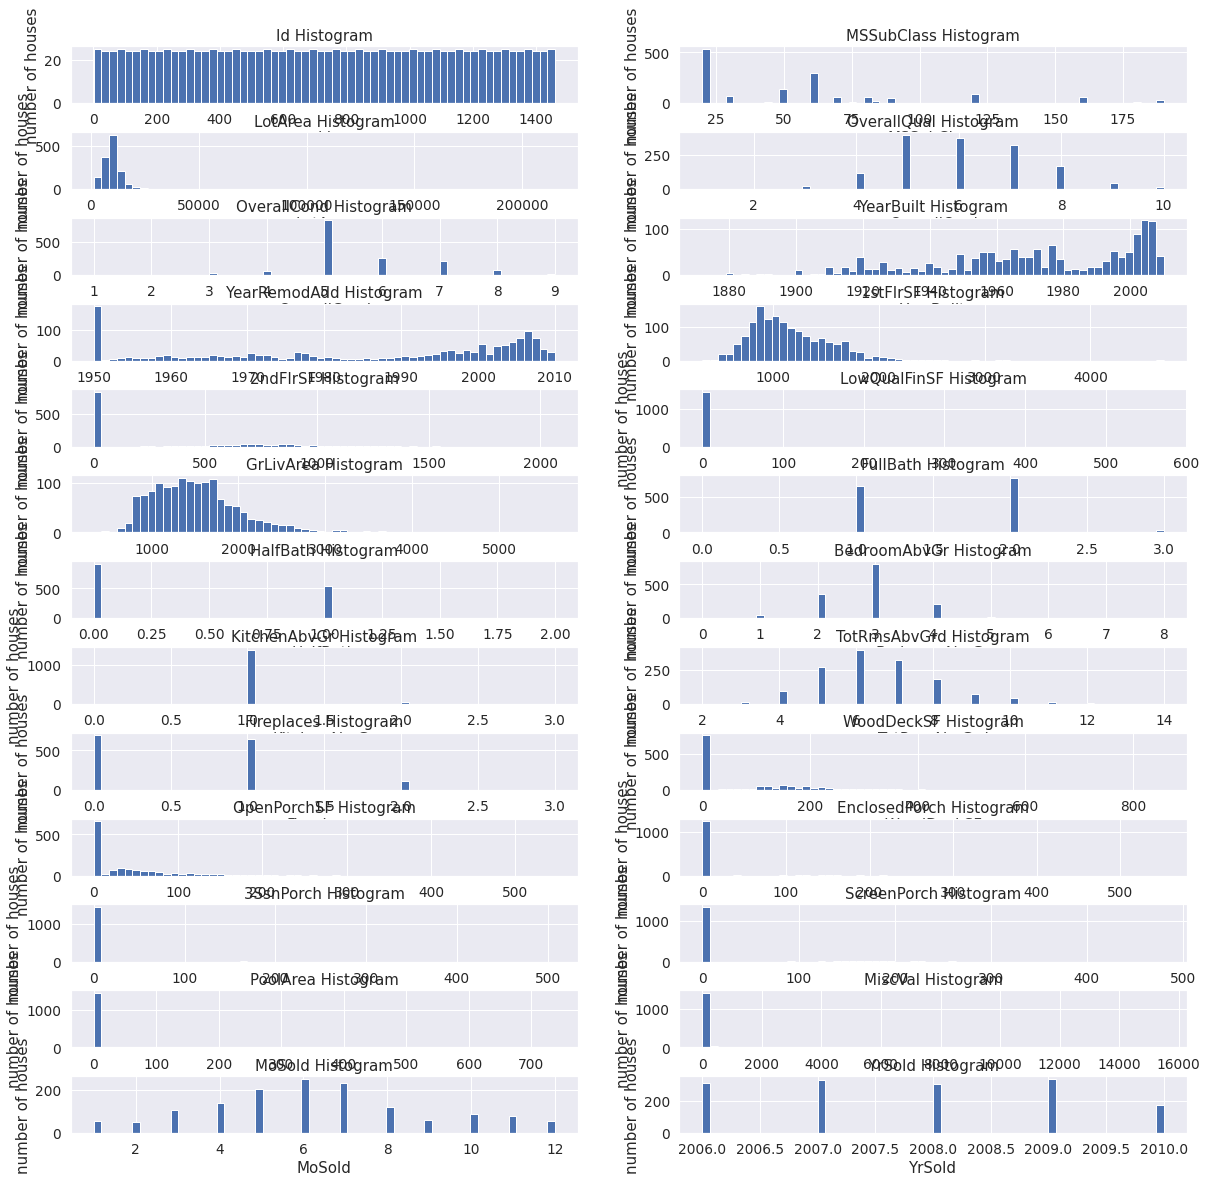

In [1113]:
print("int type features:")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(int_cols):
    plt.subplot(13,2,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)


float type features:


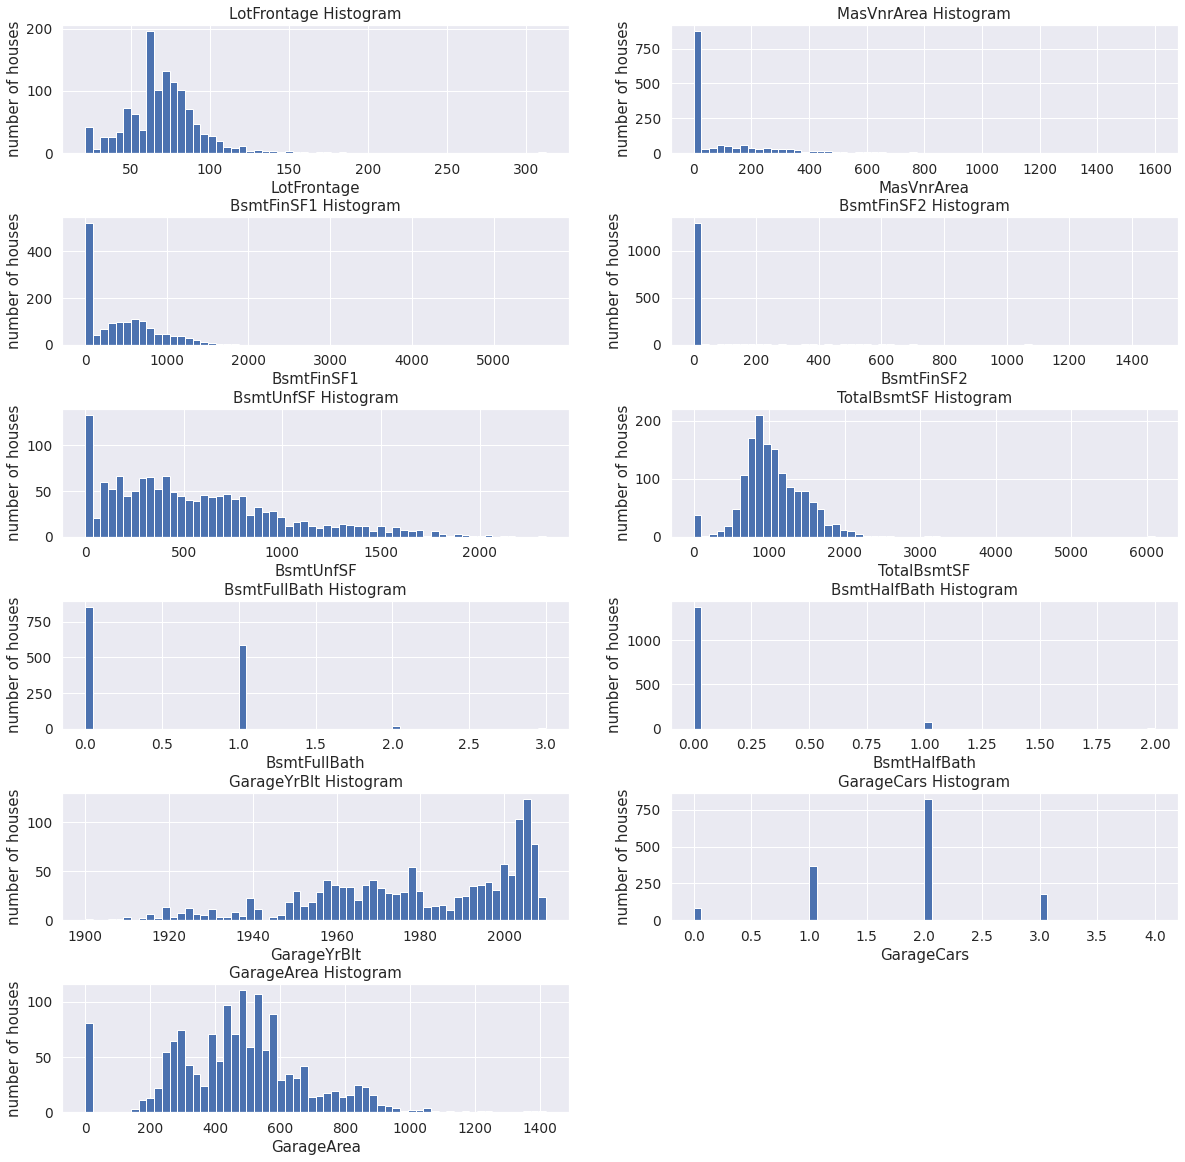

In [1114]:
print("float type features:")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(float_cols):
    plt.subplot(6,2,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

Categorial type features:


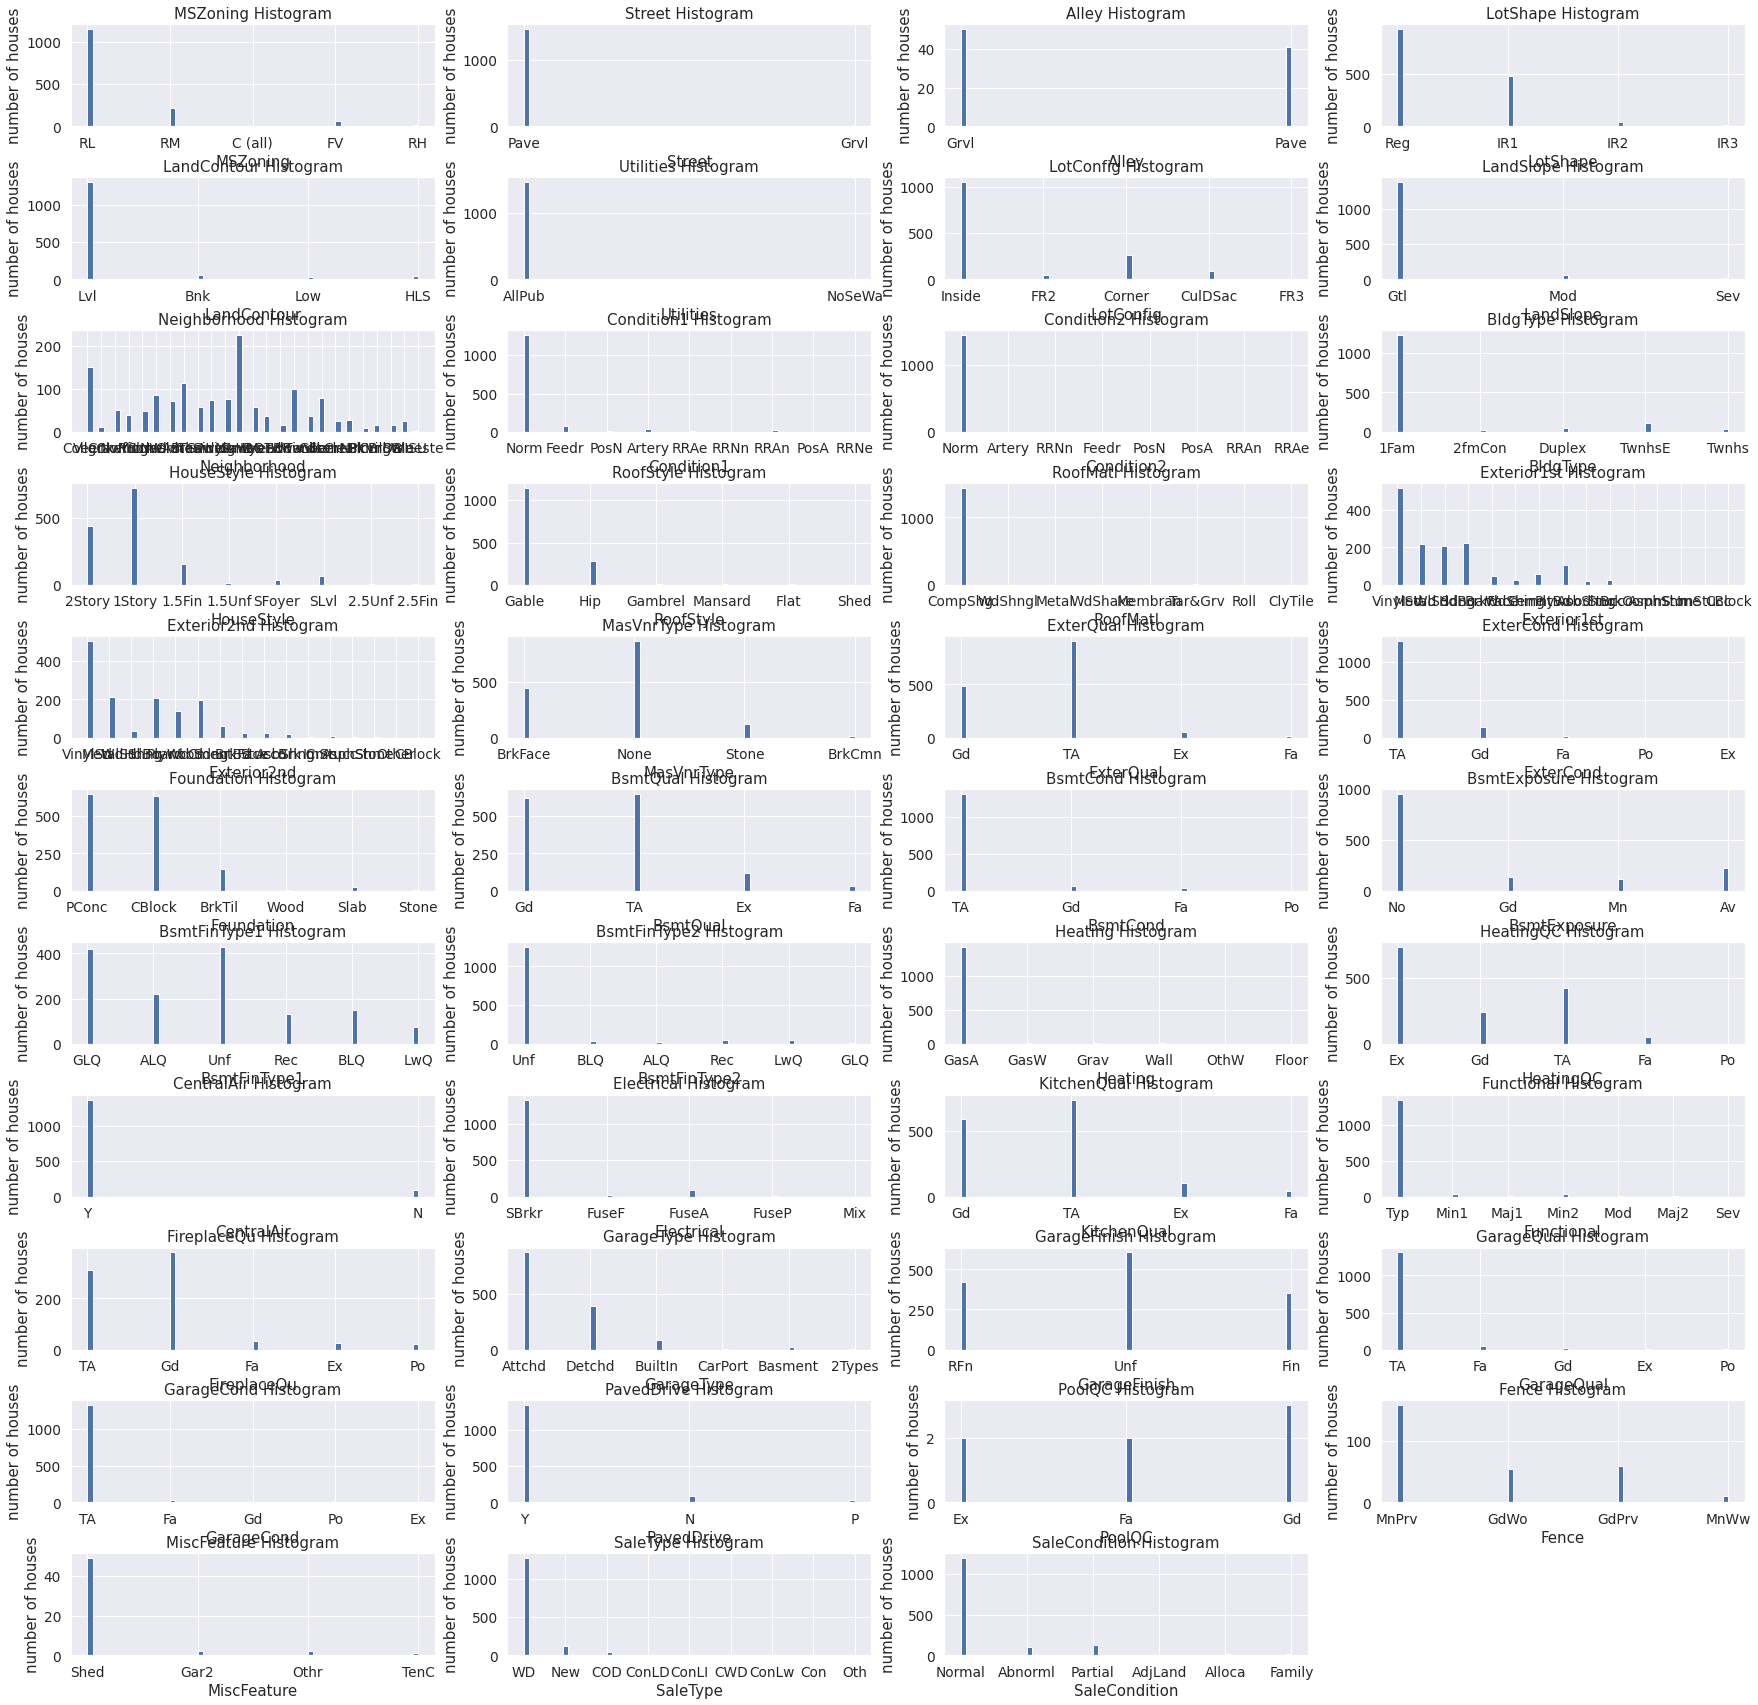

In [1115]:
print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

factorize categorial values

# Section 2: Feature Engineering



## 2.1 Dealing with Outliers

***outlier:***  a data point that is distant from other similar points.should be excluded from the data set. We'll do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

In [1116]:
house_df[tr_idx] 

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal  208500.0
1        2          20       RL  ...        WD         Normal  181500.0
2        3          60       RL  ...        WD         Normal  223500.0
3        4          70       RL  ...        WD        Abnorml  140000.0
4        5          60       RL  ...        WD         Normal  250000.0
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal  175000.0
1456  1457          20       RL  ...        WD         Normal  210000.0
1457  1458          70       RL  ...        WD         Normal  266500.0
1458  1459          20       RL  ...        WD         Normal  142125.0
1459  1460          20       RL  ...        WD         Normal  147500.0

[1460 rows x 81 columns]

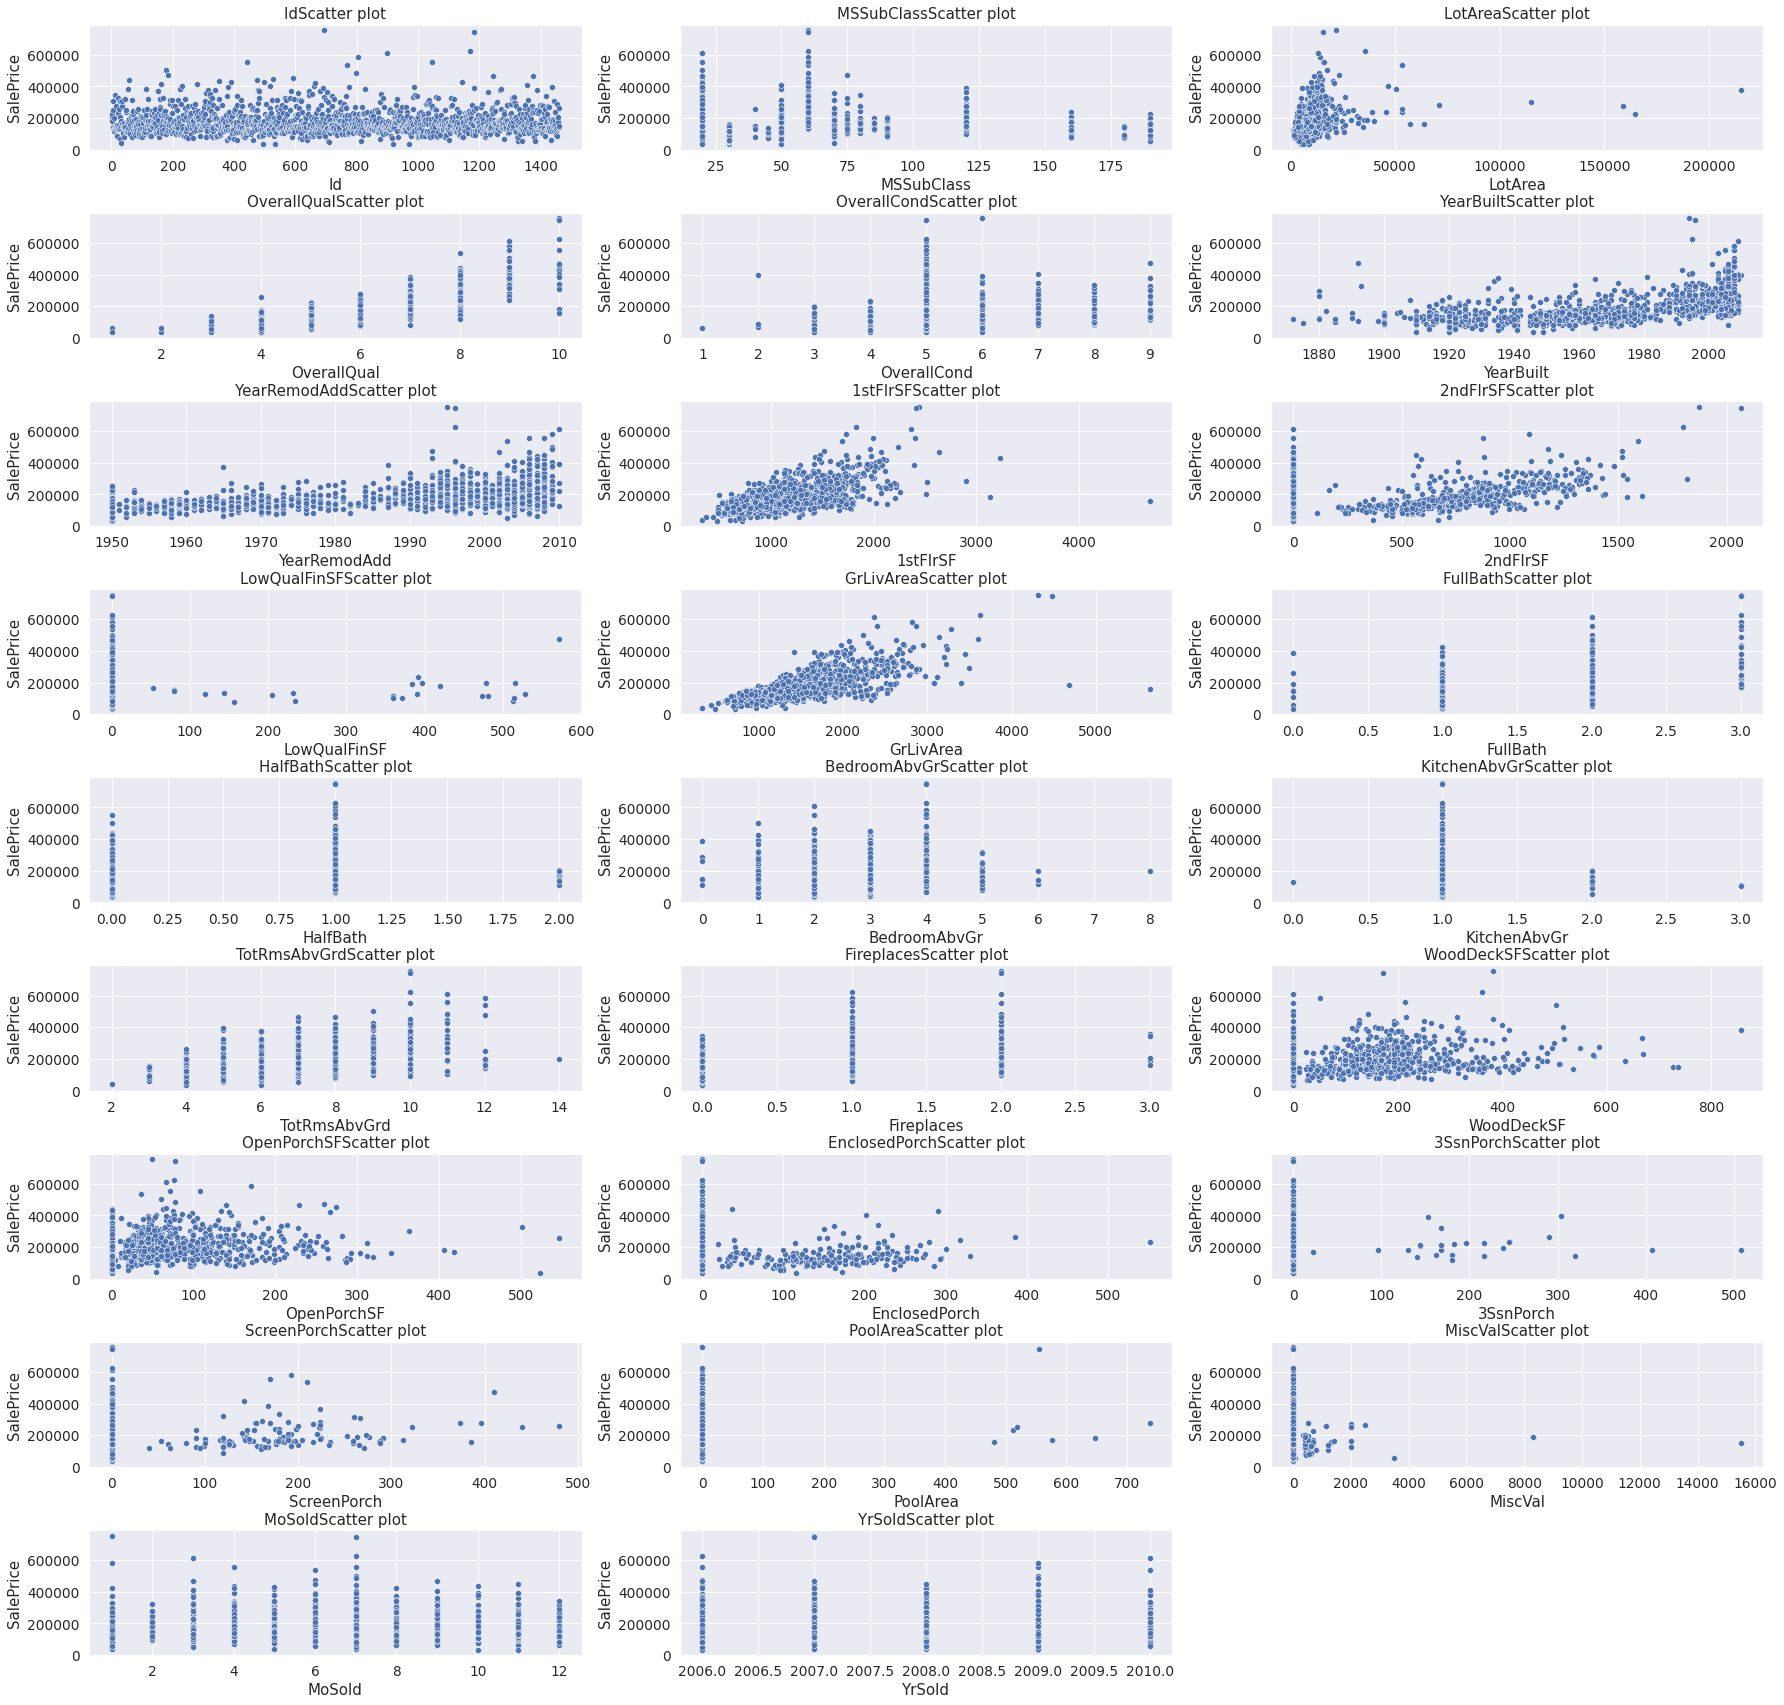

In [1117]:
# int colums scatter plot
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(int_cols):
  plt.subplot(9,3,i+1)
  fig = sns.scatterplot(data=train, x=var, y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  str3= "".join([var,'Scatter plot'])
  fig.set_title(str3)
plt.show()


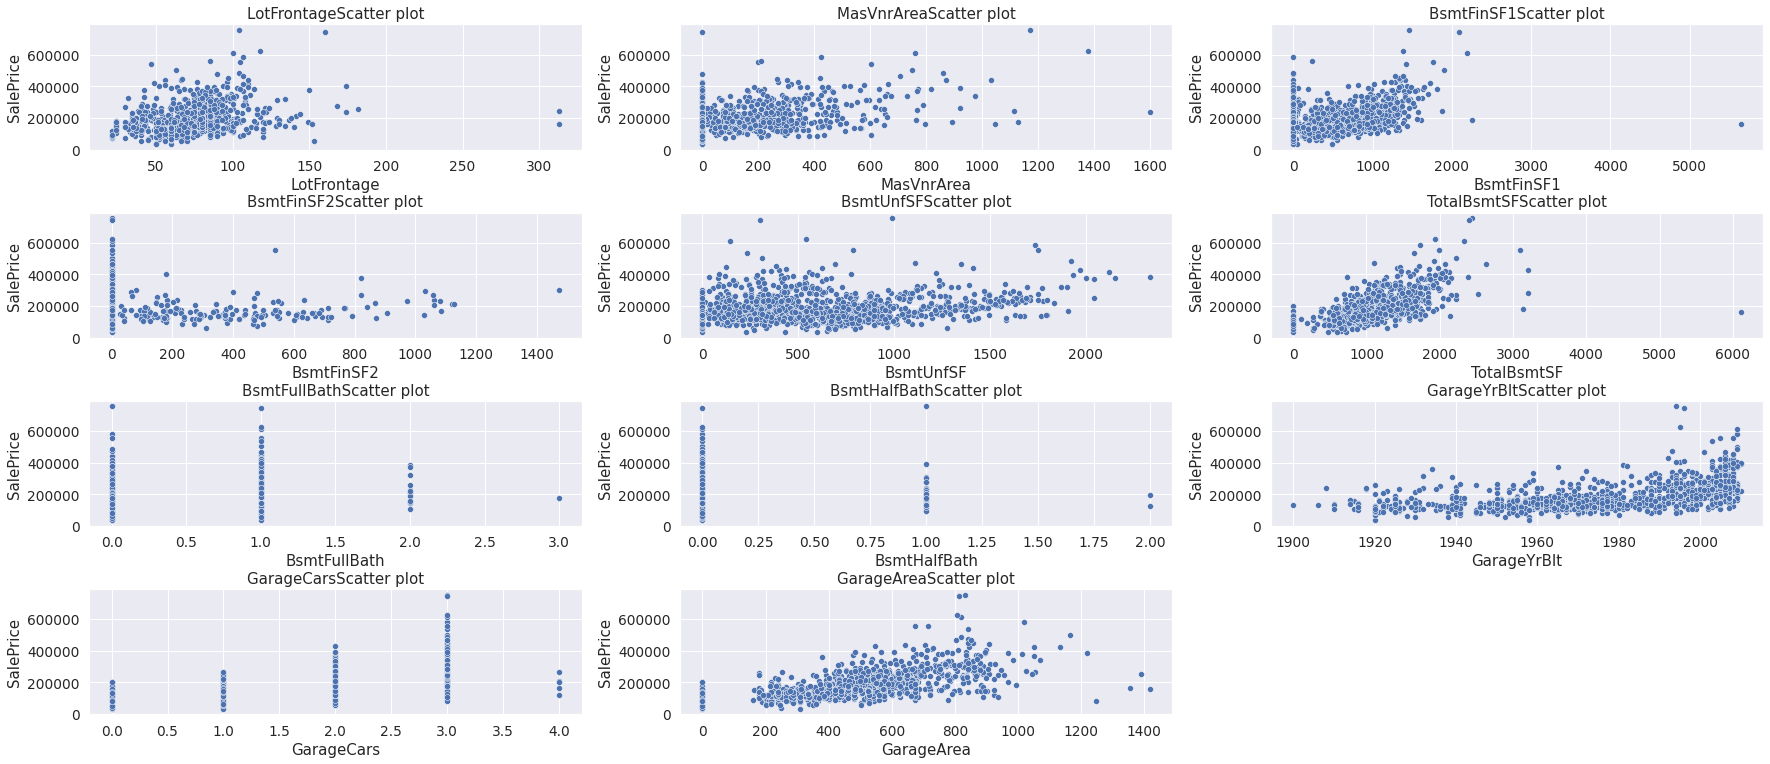

In [1118]:
# float colums scatter plot
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(float_cols):
  plt.subplot(9,3,i+1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  str3= "".join([var,'Scatter plot'])
  fig.set_title(str3)
plt.show()

In [1119]:
# Amit: We dosent need this when useing the 'remove_Outlier' function
"""
index = (house_df[tr_idx]['LotArea'] > 100000)
index_list = list(house_df[tr_idx][index].index)
print(index_list)
house_df = house_df.drop(index_list)
house_df
"""

"\nindex = (house_df[tr_idx]['LotArea'] > 100000)\nindex_list = list(house_df[tr_idx][index].index)\nprint(index_list)\nhouse_df = house_df.drop(index_list)\nhouse_df\n"

In [1120]:
# Amit: outdated function, use the currect one
"""
def remove_Outlier(data,tr_idx ,feature_name, value):
  index = (data[tr_idx][feature_name] > value)
  index_list = list(data[tr_idx][index].index)
  data = data.drop(index_list)
  return data
  """

'\ndef remove_Outlier(data,tr_idx ,feature_name, value):\n  index = (data[tr_idx][feature_name] > value)\n  index_list = list(data[tr_idx][index].index)\n  data = data.drop(index_list)\n  return data\n  '

In [1121]:
def remove_Outlier(data, feature_name, value):
  idx = (data[feature_name] > value)
  index_list = list(data[idx].index)
  data = data.drop(index_list)
  return data

**lets Analyze where the outliers are hidding:**

by observing the scatter praphs above we can notice the following ouliers data points:

**For integer represented features**:

1. LotArea feature - over 100000
2. 1stFlrSF feature - over 2500
3. 2ndFlrSF feature - over 1750
4. GrLiveArea feature - over 4000
5. WoodDeckSF feature - over 700
6. PoolArea feature - over 400
7. MiscVal feature - over 8000
8. EnclosedPorch feature - over 350




In [1122]:
"""
# int cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 100000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)
# float cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)
"""

'\n# int cols\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 100000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)\n# float cols\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)\n'

In [1123]:
"""
# int cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 100000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)
# float cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)
"""

'\n# int cols\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 100000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)\n# float cols\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)\nhouse_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)\n'

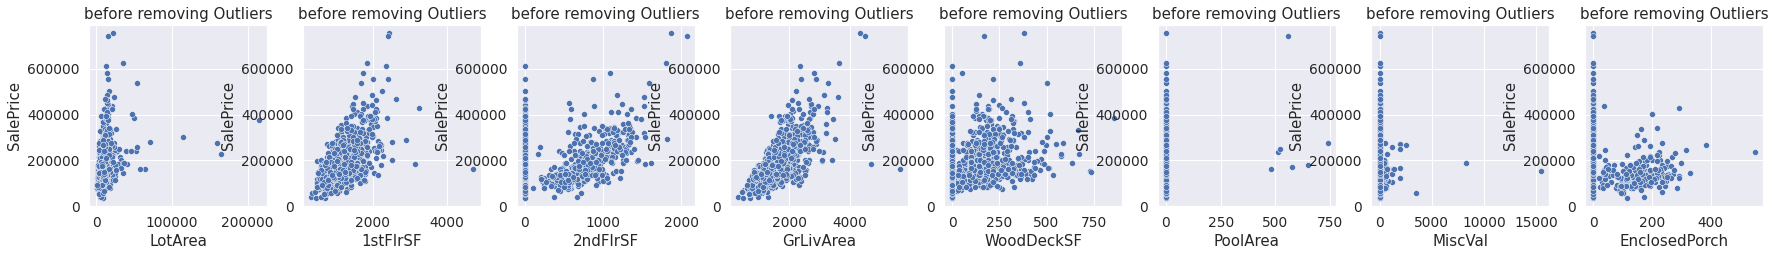

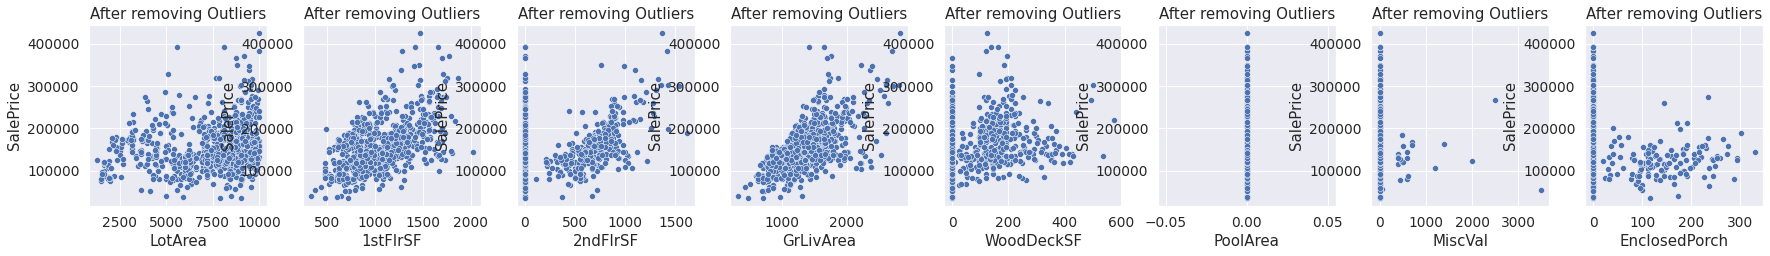

In [1124]:
plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
for i, var in enumerate(["LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF", "PoolArea", "MiscVal", "EnclosedPorch"]):
  plt.subplot(2,8,i+1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("before removing Outliers")
plt.show()
# int cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 10000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)

plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
for i, var in enumerate(["LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF", "PoolArea", "MiscVal", "EnclosedPorch"]):
  plt.subplot(2,8,i+9)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("After removing Outliers")
plt.show()

In [1125]:
float_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

**For float represented features**:

1. MasVnrArea feature - over 1200
2. BsmtFinSF1 feature - over 2000
3. BsmtFinSF2 feature - over 1200
4. TotalBsmtSF feature - over 3000
5. GarageArea feature - over 1100

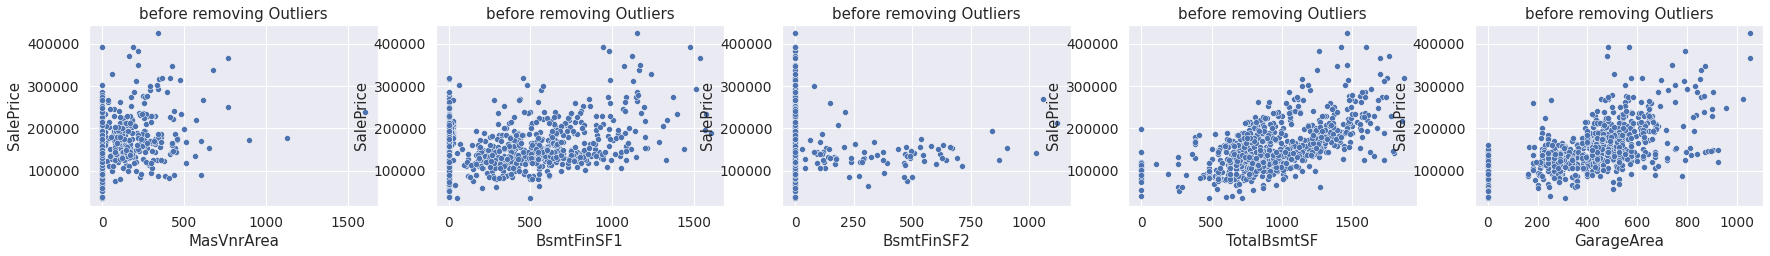

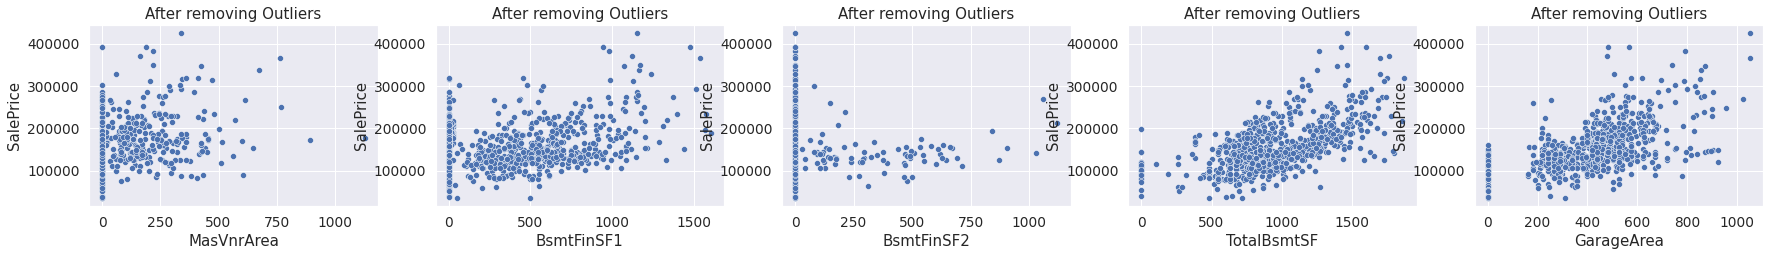

In [1126]:
plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
float_Outliers = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF", "GarageArea"]
for i, var in enumerate(float_Outliers):
  plt.subplot(2,len(float_Outliers),i+1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("before removing Outliers")
plt.show()

# float cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)

plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
for i, var in enumerate(float_Outliers):
  plt.subplot(2, len(float_Outliers),i + len(float_Outliers) + 1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("After removing Outliers")
plt.show()

When removing outliers according to the int colum, we notice that other outlier has been remove (according to other colums). The reasone behide it is that some samples conation multiple outliers according to different features. This is another reason to throw outlier samples.  

After applying the outliers removal severl times for different features, we notice that the most beneficial removal of outliers contain the following features as described in function: 

1. LotFrontage > 200
2. BsmtFinSF1 > 2000
3. 1stFlrSF > 2500
4. TotalBsmtSF > 3000
5. GrLivArea > 4000
6. LotArea > 100000


In [1127]:
def Remove_all_ourliers(data):
  data = remove_Outlier(data, "LotFrontage", 200)
  data = remove_Outlier(data, "BsmtFinSF1", 2000)
  data = remove_Outlier(data, "1stFlrSF", 2500)
  data = remove_Outlier(data, "TotalBsmtSF", 3000)
  data = remove_Outlier(data, "GrLivArea", 4000)
  data = remove_Outlier(data, "LotArea", 100000)
  return data

In [1128]:
# Creating new train, test and house_df after droping outliers samples
train_rm_o = Remove_all_ourliers(train)
test_rm_o = Remove_all_ourliers(test)
house_df_rm_o = pd.concat([train_rm_o,test_rm_o],ignore_index = True, sort = False)
tr_idx_rm = house_df_rm_o['SalePrice'].notnull() ## display data with on
te_idx_rm = [not elem for elem in tr_idx]
te_idx_rm = pd.Series(te_idx)

## 2.2 Feature removal

In the database, there are features that missing from samples, we need to treat them correcty. Dropping all the feature with missing values usally not recommended. However, it is ok if most of ths values of the feature are missing. In this section we remove all the feature that most of its values are missing

https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

In [1129]:
X_train = house_df_rm_o[tr_idx_rm].drop(['SalePrice'], axis=1)
X_test = house_df_rm_o[te_idx_rm]
Y_train = house_df_rm_o[tr_idx_rm].SalePrice
Y_test = house_df_rm_o[te_idx_rm].SalePrice
overall_X = house_df_rm_o
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(overall_X.shape)

(1443, 80)
(1443,)
(1431, 81)
(1431,)
(2891, 81)


**correlation**:
Relationship between SalePrice and other numerical columns

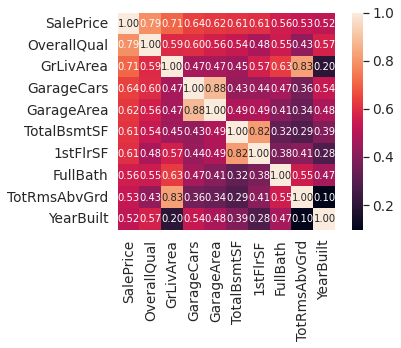

In [1130]:
# correlation matrix
corrmat = train.corr()
# f, ax = plt.subplots(figsize=(25, 25))
# # sns.heatmap(corrmat, vmax=.8, square=True);
# hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
# plt.show()

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Most correlated variables according to the dataset description:


* **OverallQual** = Rates the overall material and finish of the house
* **GrLivArea** = Above grade (ground) living area square feet
* **TotalBsmtSF** = Total square feet of basement area
* **GarageCars** = Size of garage in car capacity
* **GarageArea** = Size of garage in square feet
* **TotalBsmtSF** = Total square feet of basement area
* **1stFlrSF** = First Floor square feet
* **FullBath** = Full bathrooms above grade
* **TotRmsAbvGrd** = Total rooms above grade (does not include bathrooms)
* **YearBuilt** = Original construction date

Having the variables with the most correlation with Saleprice we can make the following conlusions:

* **GarageCars** and **GarageArea** are basically the same, de amount of cars will vary on the total size are of the garage, so we can select one of these columns for and drop the other one.
* **TotalBsmtSF** and **1stFlrSF** also looks very similar, we will keep **TotalBsmtSF**
YearBuilt it is wierd how the correlation shows the contruction year not so correlated to the salePrice, some reasons could be the fact that olds hourses might be renovated or located in better areas.

So, now we can implement feature removal according to 3 factors:

1. **missing_features**: represent the features where most of them missing 

2. **irellvent_features**: represent feature without correlatiuon to the SalePrice

3. **corr_features**: features with high correlation between them 

In [1159]:
def featureDrop(data, tr_idx, ifPrint=False):
  missing_features = [col for col in data[tr_idx].columns if (data[tr_idx][col].isnull().sum() / data[tr_idx].shape[0]) * 100 > 50]
  irellvent_features = ['Id']
  # corr_features = ['GarageArea', '1stFlrSF']
  drop_features = missing_features + irellvent_features
  data_drop = data.drop(drop_features, axis=1)
  if ifPrint:
    print('missing_features: {}'.format(missing_features))
    print('irellvent_features: {}'.format(irellvent_features))
  return data_drop

X_df_drop = featureDrop(overall_X, tr_idx, ifPrint=True)
X_train_drop = X_df_drop[tr_idx]
X_test_drop = X_df_drop[te_idx]

print('X_df_drop shape:     {}'.format(X_df_drop.shape))
print('X_train_drop shape:  {}'.format(X_train_drop.shape))
print('X_test_drop shape:   {}'.format(X_test_drop.shape))
print(type(tr_idx))

missing_features: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
irellvent_features: ['Id']
X_df_drop shape:     (2891, 76)
X_train_drop shape:  (1460, 76)
X_test_drop shape:   (1431, 76)
<class 'pandas.core.series.Series'>


Because we removed fetures, the cloums changed:

In [1132]:
# Select categorical columns
categorical_cols = [cname for cname in X_df_drop.loc[:,:'SaleCondition'].columns if
                    X_df_drop[cname].nunique() < 200 and 
                    X_df_drop[cname].dtype == "object"]

print("Number of Categorical fetures:",(len(categorical_cols)))
# Select numerical columns
int_cols = [cname for cname in X_df_drop.loc[:,:'SaleCondition'].columns if 
                X_df_drop[cname].dtype in ['int64']]
    
print("Number of integer fetures:",(len(int_cols)))

float_cols = [cname for cname in X_df_drop.loc[:,:'SaleCondition'].columns if 
                X_df_drop[cname].dtype in ['float64']]
print("Number of float fetures:",(len(float_cols)))

Number of Categorical fetures: 39
Number of integer fetures: 24
Number of float fetures: 10


## 2.3 Encoding categorical features

#### 2.3.1 Label encoding categorical features

Another option is using Label Encoding which refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

In [1133]:
"""
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X_df_drop.isna().sum())
missing_data_prec = missing_data/X_df_drop.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')
"""

"\npd.set_option('display.max_rows', None)\nmissing_data = pd.DataFrame(X_df_drop.isna().sum())\nmissing_data_prec = missing_data/X_df_drop.shape[0] * 100\nmissing_data = pd.concat([missing_data,missing_data_prec], axis=1)\nmissing_data.columns =['occurence', 'precentage']\nprint(missing_data)\npd.reset_option('all')\n"

Categorial type features:


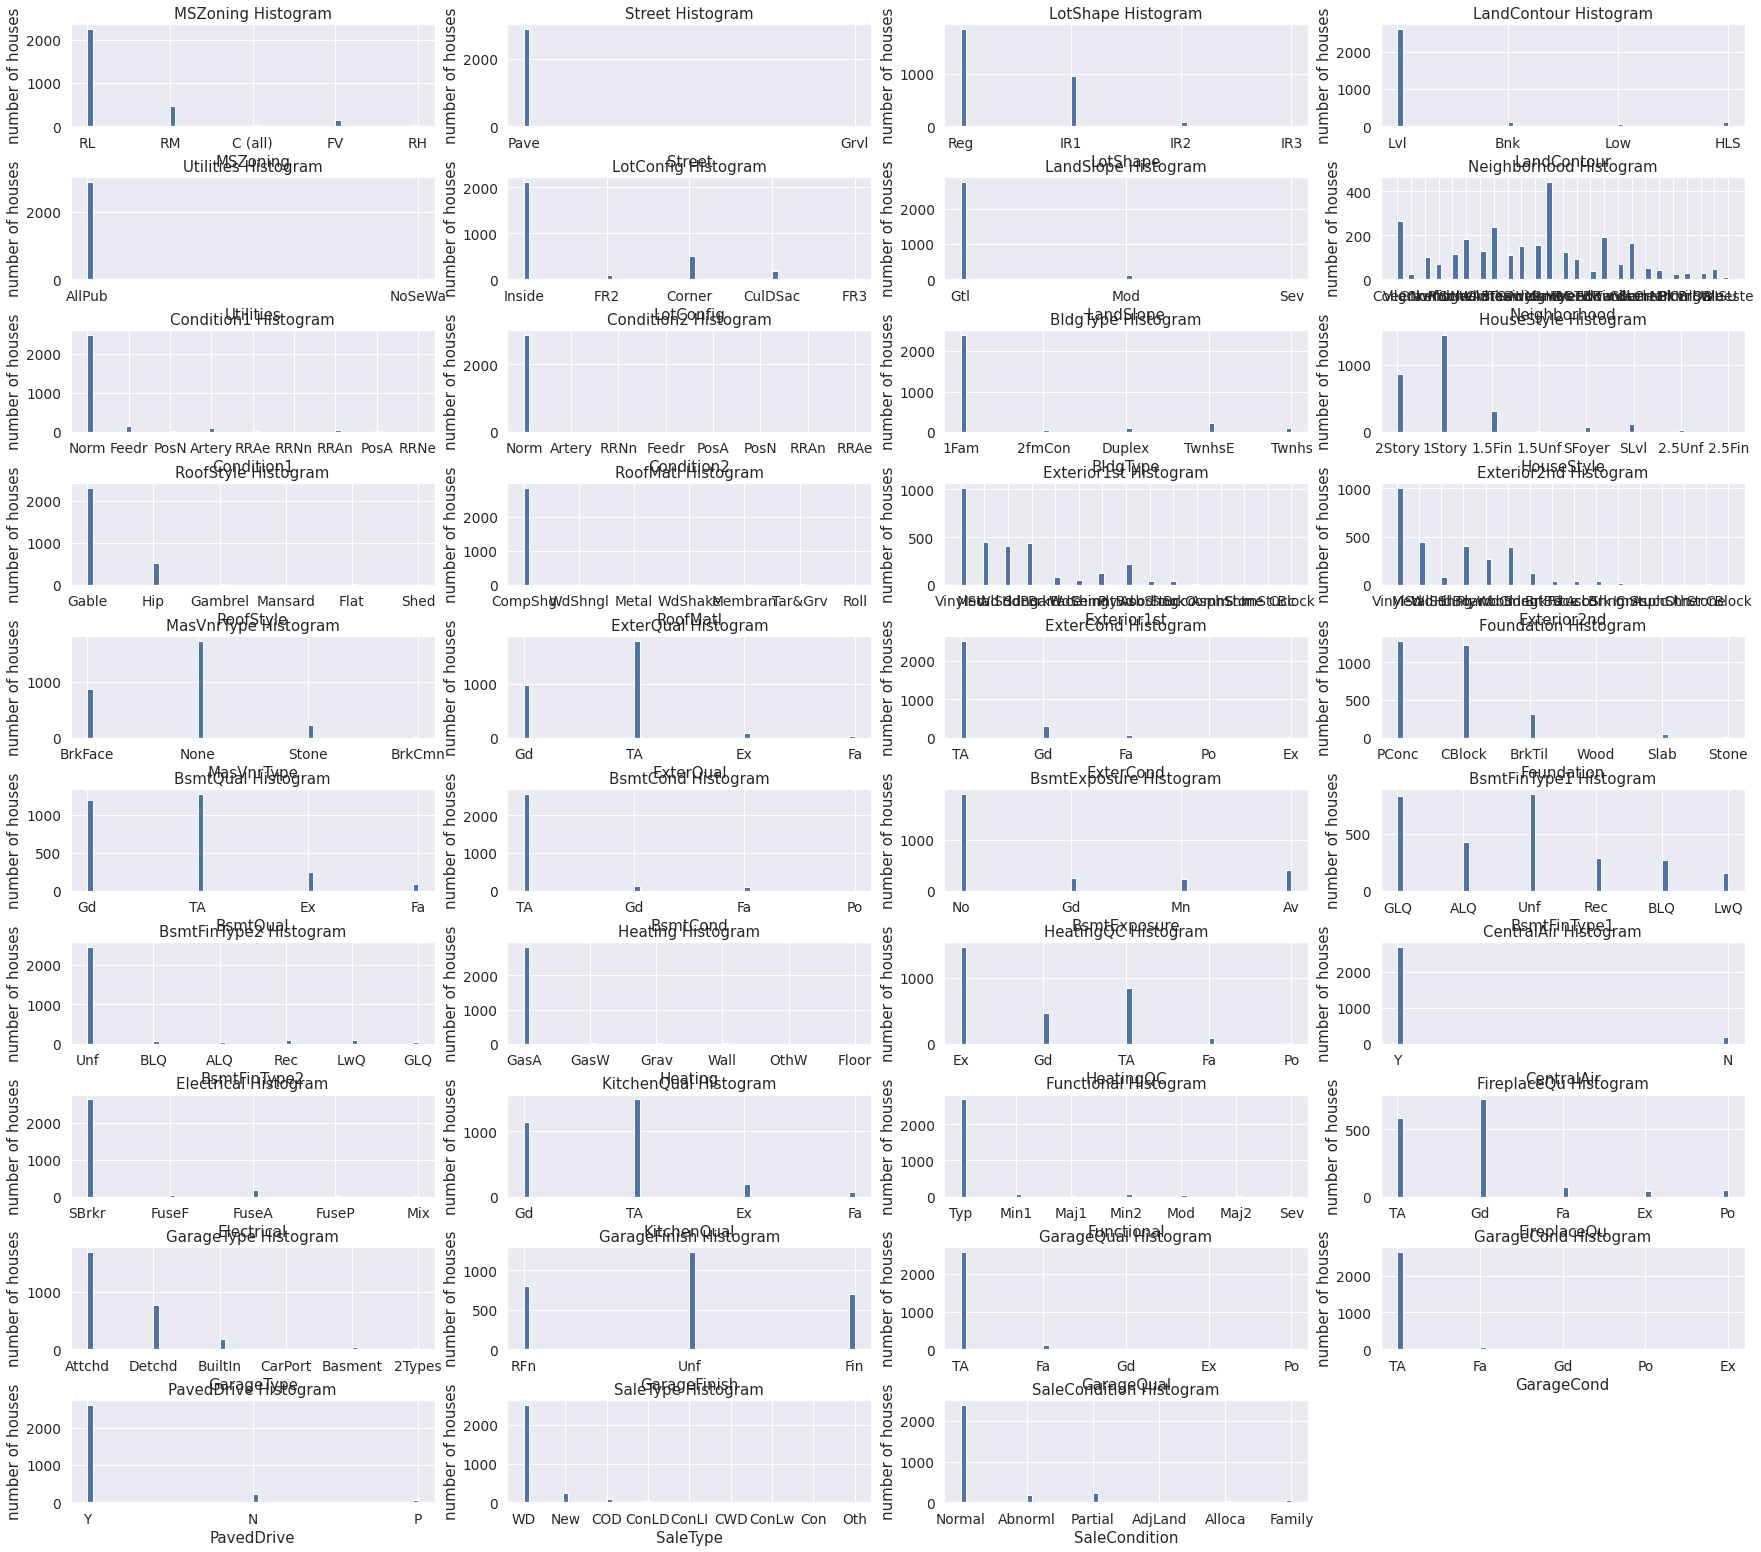

In [1134]:
# scatter plot: Categorial type features
print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = X_df_drop[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

Categorial type features:


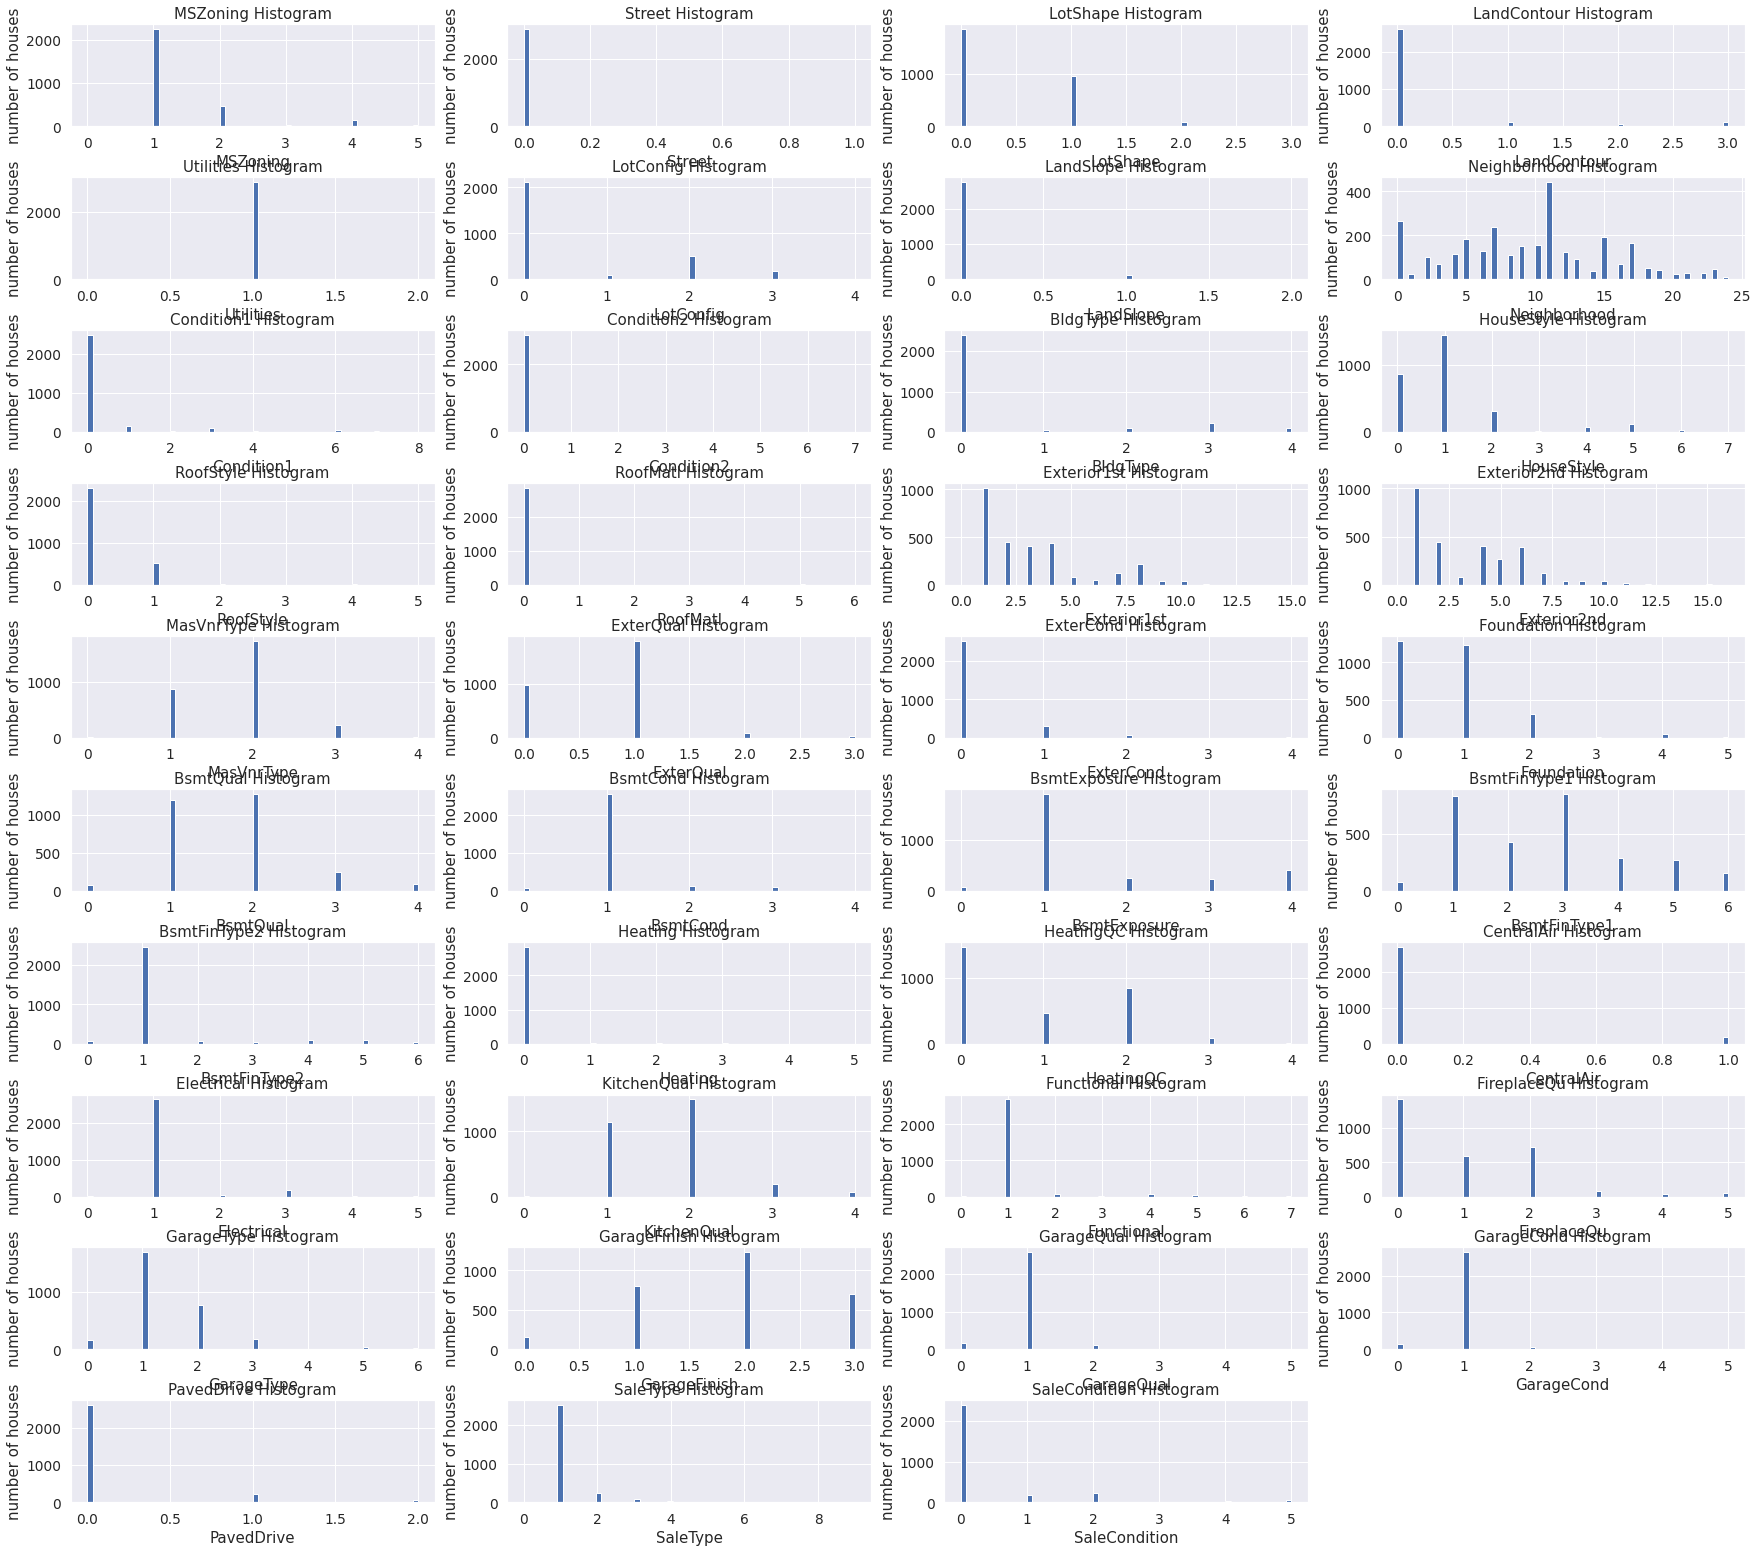

In [1136]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


def Labaling_V2(data):
  df = data
  df = df.apply(lambda series: pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index=series[series.notnull()].index))
  return df

  
house_df_lab = Labaling_V2(X_df_drop)

print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = house_df_lab[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)



#### 2.3.2 Factorizing categorical features

Categorial type features:


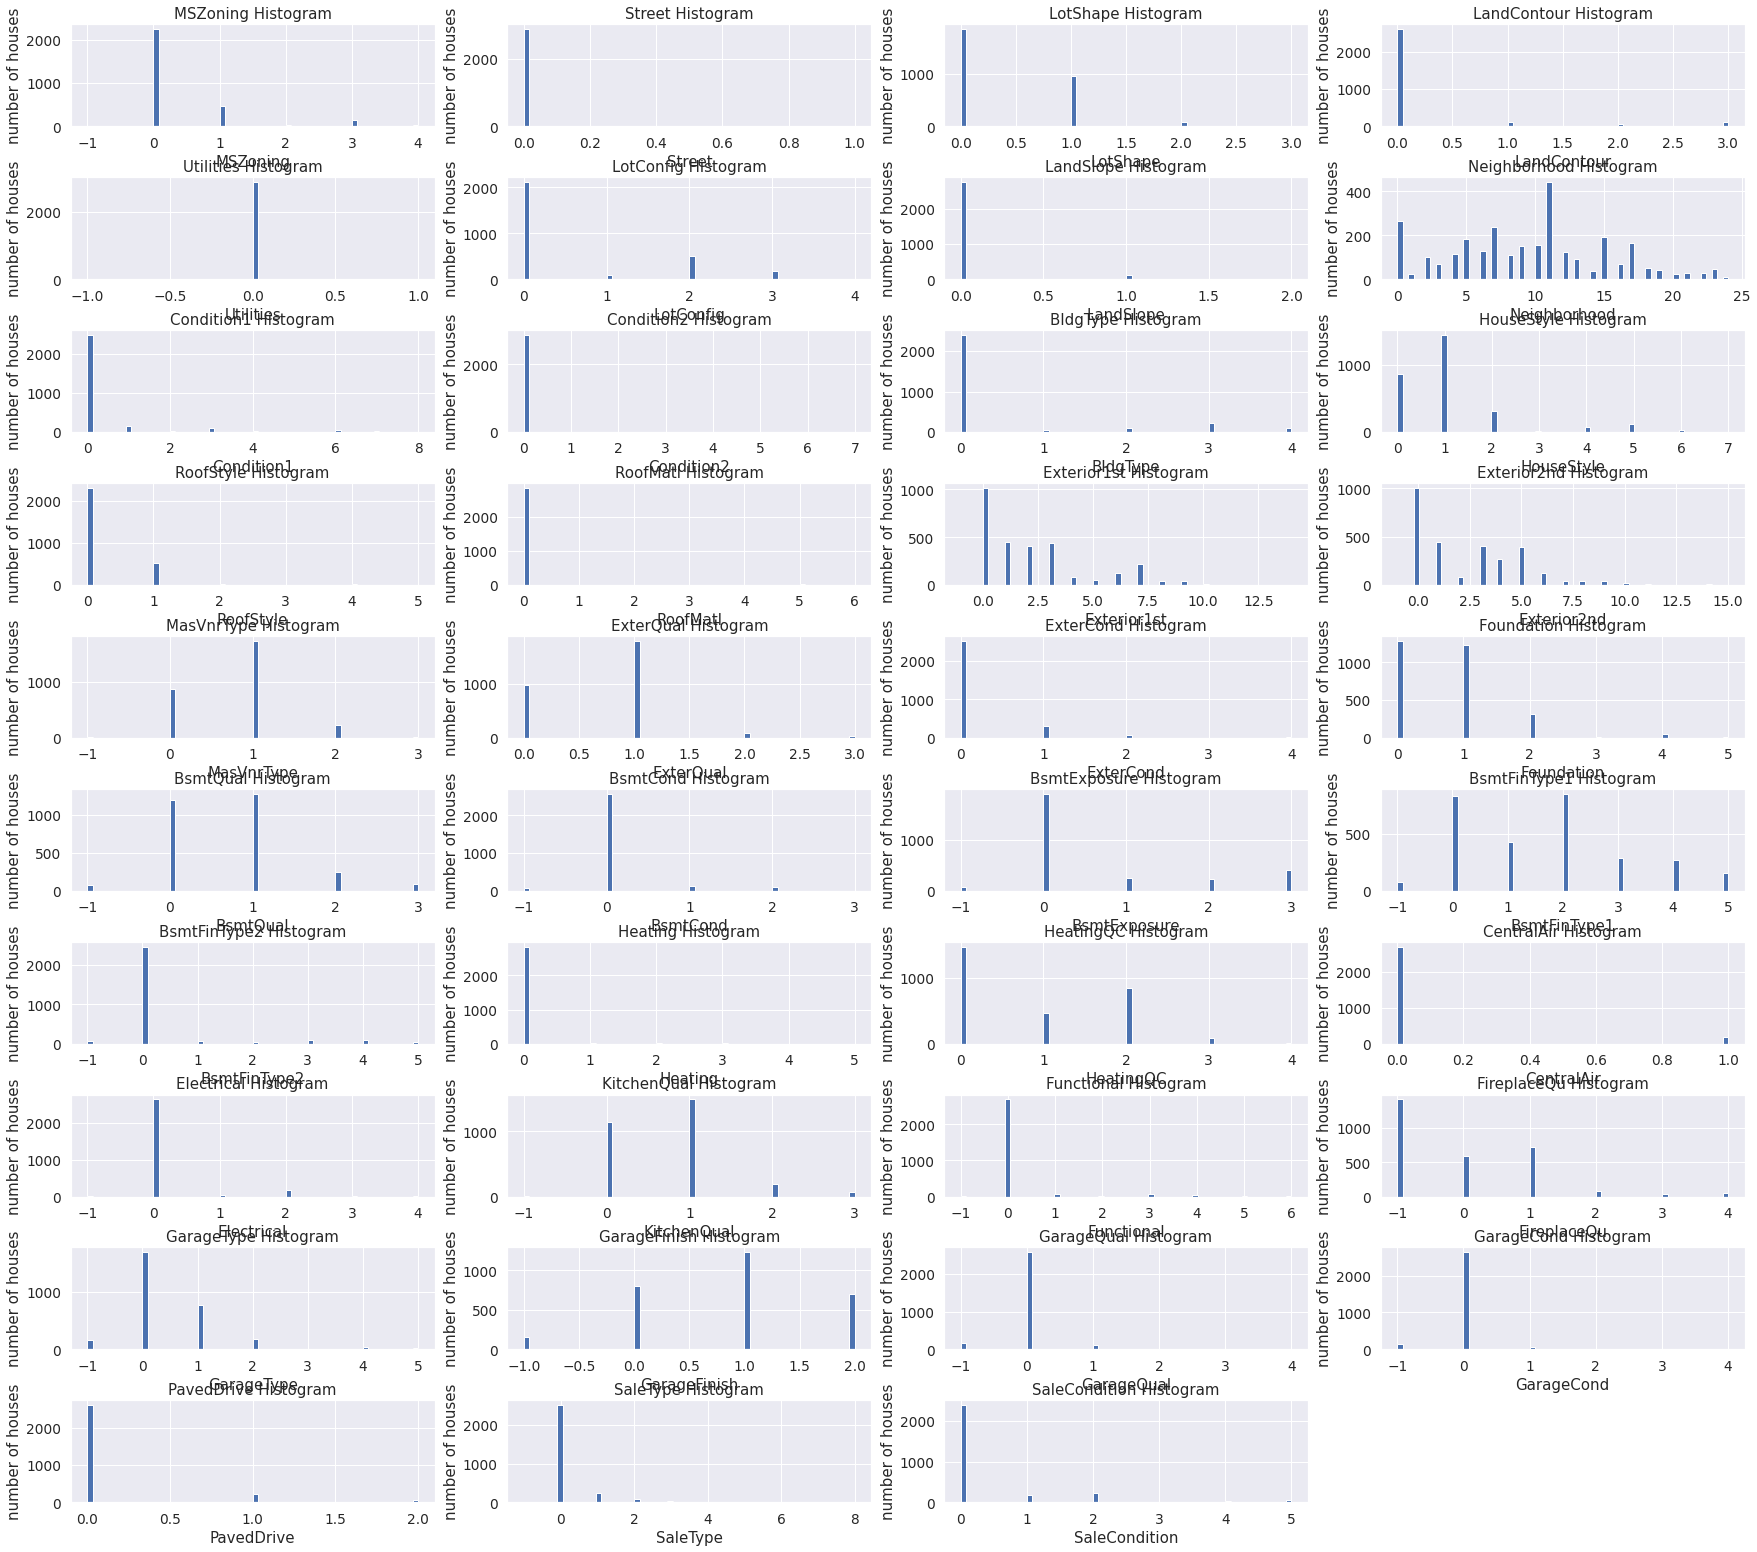

In [1135]:
def factorization(data, categorical_cols):
  for c in categorical_cols:
    data[c] = pd.factorize(data[c])[0]
  return data

house_df_fac = X_df_drop
house_df_fac = factorization(house_df_fac, categorical_cols)

print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = X_df_drop[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

#### 2.3.3 One-hot encoding categorical features
We apply One-Hot Encoding when:

The categorical feature is not ordinal (like the countries above)
The number of categorical features is less so one-hot encoding can be effectively applied
We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [1137]:
"""
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(df.isna().sum())
missing_data_prec = missing_data/df.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')
"""

"\npd.set_option('display.max_rows', None)\nmissing_data = pd.DataFrame(df.isna().sum())\nmissing_data_prec = missing_data/df.shape[0] * 100\nmissing_data = pd.concat([missing_data,missing_data_prec], axis=1)\nmissing_data.columns =['occurence', 'precentage']\nprint(missing_data)\npd.reset_option('all')\n"

## 2.4 Replacing missing values

### 2.4.1 Categorical colums: replacing with statistical value

In [1138]:
X = house_df_lab
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X.isna().sum())
missing_data_prec = missing_data/X.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

               occurence  precentage
MSSubClass             0    0.000000
MSZoning               0    0.000000
LotFrontage          479   16.568661
LotArea                0    0.000000
Street                 0    0.000000
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              0    0.000000
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            0    0.000000
Exterior2nd            0    0.000000
MasVnrType             0    0.000000
MasVnrArea            22    0.760982
ExterQual              0    0.000000
E

we should try to apply the missing values algorithms for the concatanate data, and on the train data by itself.

In [1139]:
from sklearn.impute import SimpleImputer, KNNImputer
class Impute_class(object):
  def __init__(self, X):
    self.X = X

  def impute_values(self, cols, method, K = 2):
    data = self.X
    self.method = method
    self.K = K
    imputer = self.impute_method()
    imputer.fit(self.X)
    new_X = pd.DataFrame(imputer.fit_transform(self.X[cols]))
    new_X.cols = self.X[cols].columns
    data[cols] = new_X
    return data

  def impute_method(self):
    if self.method == "zero":
      imputer = SimpleImputer(add_indicator=False, strategy="constant", fill_value=0)

    elif self.method == "mean":
      imputer = SimpleImputer(add_indicator=False, strategy="mean")

    elif self.method == "median":
      imputer = SimpleImputer(add_indicator=False, strategy="median")
      
    elif self.method == "most_frequent":
      imputer = SimpleImputer(add_indicator=False, strategy="most_frequent")

    elif self.method == "KNN":
      imputer = KNNImputer(n_neighbors=self.K, weights="uniform")
      
    return imputer

In [1140]:
I = Impute_class(X=house_df_lab)
I.impute_values(cols=categorical_cols, method= "median")
X = I.X

In [1141]:
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X.isna().sum())
missing_data_prec = missing_data/X.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

               occurence  precentage
MSSubClass             0    0.000000
MSZoning               0    0.000000
LotFrontage          479   16.568661
LotArea                0    0.000000
Street                 0    0.000000
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              0    0.000000
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            0    0.000000
Exterior2nd            0    0.000000
MasVnrType             0    0.000000
MasVnrArea            22    0.760982
ExterQual              0    0.000000
E

In [1142]:
"""
I = Impute_class(X=X)
# I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=10)
X = I.X

pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X.isna().sum())
missing_data_prec = missing_data/X.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')
"""

'\nI = Impute_class(X=X)\n# I.impute_values(cols=categorical_cols, method= "most_frequent")\nI.impute_values(cols= int_cols, method= "median")\nI.impute_values(cols= float_cols, method= "KNN", K=10)\nX = I.X\n\npd.set_option(\'display.max_rows\', None)\nmissing_data = pd.DataFrame(X.isna().sum())\nmissing_data_prec = missing_data/X.shape[0] * 100\nmissing_data = pd.concat([missing_data,missing_data_prec], axis=1)\nmissing_data.columns =[\'occurence\', \'precentage\']\nprint(missing_data)\npd.reset_option(\'all\')\n'

### 2.4.2 Missing Values - int and float colums

In [1143]:
I = Impute_class(X=X)
# I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=10)
X = I.X

pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X.isna().sum())
missing_data_prec = missing_data/X.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

               occurence  precentage
MSSubClass             0    0.000000
MSZoning               0    0.000000
LotFrontage            0    0.000000
LotArea                0    0.000000
Street                 0    0.000000
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              0    0.000000
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            0    0.000000
Exterior2nd            0    0.000000
MasVnrType             0    0.000000
MasVnrArea             0    0.000000
ExterQual              0    0.000000
E

## 2.5 Taking care of skewed target

The Sale price is a bit skewed, and for linear models its important that you normalize your data, so im going to log transform it

In [1144]:
house_df_X = X
house_df_X
train_X = house_df_X[tr_idx_rm]
test_X = house_df_X[te_idx_rm]

In [1145]:
Y_price = house_df_rm_o[tr_idx_rm].SalePrice
Y_price

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1438    175000.0
1439    210000.0
1440    266500.0
1441    142125.0
1442    147500.0
Name: SalePrice, Length: 1443, dtype: float64

Text(0.5, 1.0, 'Log Transform Target SalePrice - unskewed')

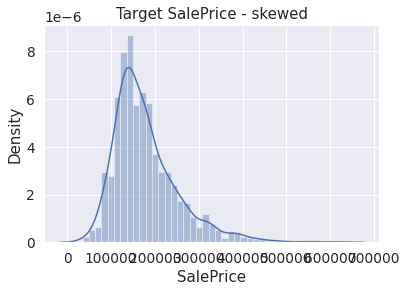

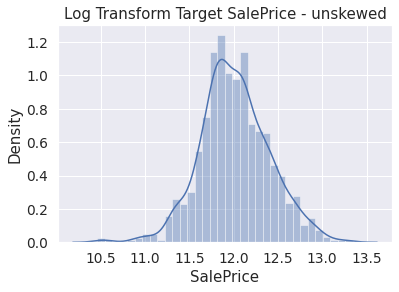

In [1146]:
plt.figure()
sns.distplot(Y_price);
Y_price_log = np.log1p(Y_price)
plt.title('Target SalePrice - skewed')
plt.figure()
sns.distplot(Y_price_log)
plt.title('Log Transform Target SalePrice - unskewed')



##2.6 Normalize features

https://www.width.ai/pandas/normalize-column-pandas-dataframe

There is a problem here since all elements became float type - its sh

In [1147]:
from scipy import stats
house_df_X_norm = pd.DataFrame(stats.zscore(house_df_X))
house_df_X_norm.columns = house_df_X.columns

# Section 3: Implement prediction models

## 3.1 Model implemention and evaluation

In [1151]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

class Regression_model(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def Linear_reg(self):
        self.model = LinearRegression(normalize=True)
        self.model.fit(self.X, self.Y)

    def Lasso_reg(self, alphas):
        self.model = LassoCV(alphas=alphas)
        self.model.fit(self.X, self.Y)
        
    def Ridge_reg(self, alpha):
        self.model = Ridge(alpha)
        self.model.fit(self.X, self.Y)

    def KernelRidge_reg(self, alpha):
        self.model = KernelRidge(alpha)
        self.model.fit(self.X, self.Y)

    def RidgeKfold_reg(self, alphas):
        # should enter a list of alphas - algorithem uses the most beneficial
        # alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1] 
        self.model = RidgeCV(alphas)
        self.model.fit(self.X, self.Y)

    def Poly_reg(self):
        self.model = PolynomialFeatures(interaction_only=True)
        self.model.fit(self.X, self.Y)

    def score_dataset(self, X_test, y_test, ifPrint=True):
        preds = self.model.predict(X_test)
        MAE = mean_absolute_error(y_test, preds)
        R2 = r2_score(y_test,y_pred=preds)
        RMSE = np.sqrt(mean_squared_error(y_test,y_pred=preds))
        # Score = self.model.score(X_test, y_test)
        if ifPrint:
          print("MAE = {}".format(MAE))
          print("R2 = {}".format(R2))
          print("RMSE = {}".format(RMSE))
        # print("Score = {}".format(Score))
        return MAE, R2, RMSE


In [1167]:
def evaluate_model(data_train, data_valid, target_train, target_valid, ifPrint=True):
  MAE_array_train = []
  MAE_array_valid = []
  R2_array_train = []
  R2_array_valid = []
  RMSE_array_train = []
  RMSE_array_valid = []


  if ifPrint: print("Linear Regression Model results:")
  R = Regression_model(Xtrain, ytrain)
  R.Linear_reg()
  if ifPrint: print("performences over Train set:")
  Score = R.score_dataset(Xtrain, ytrain, ifPrint)
  MAE_array_train.append(Score[0])
  R2_array_train.append(Score[1])
  RMSE_array_train.append(Score[2])
  
  
  if ifPrint: print("\n")

  if ifPrint: print("performences over Validation set:")
  Score = R.score_dataset(Xvalid, yvalid, ifPrint)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  if ifPrint: print("\n")

  if ifPrint: print("Lasso Regression Model results:")
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  if ifPrint: print("performences over Train set:")
  Score = R.score_dataset(Xtrain, ytrain, ifPrint)
  MAE_array_train.append(Score[0])
  R2_array_train.append(Score[1])
  RMSE_array_train.append(Score[2])
  if ifPrint: print("\n")

  if ifPrint: print("performences over Validation set:")
  Score = R.score_dataset(Xvalid, yvalid, ifPrint)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  if ifPrint: print("\n")

  # print("Kernal Ridge Regression Model results:")
  # K_reg = R.KernelRidge_reg(10)
  # print("performences over Train set:")
  # R.score_dataset(Xtrain, ytrain)
  # print("\n")
  # print("performences over Validation set:")
  # R.score_dataset(Xvalid, yvalid)
  # print("\n")

  R.RidgeKfold_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  if ifPrint: print("Ridge Kfold Regression Model results:")
  if ifPrint: print("performences over Train set:")
  Score = R.score_dataset(Xtrain, ytrain, ifPrint)
  MAE_array_train.append(Score[0])
  R2_array_train.append(Score[1])
  RMSE_array_train.append(Score[2])
  if ifPrint: print("\n")

  if ifPrint: print("performences over Validation set:")
  Score = R.score_dataset(Xvalid, yvalid, ifPrint)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  if ifPrint: print("\n")

  if ifPrint:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    axs[0].scatter(["Linear", "Lasso", "Ridge"], MAE_array_valid)
    axs[1].scatter(["Linear", "Lasso", "Ridge"], R2_array_valid)
    axs[2].scatter(["Linear", "Lasso", "Ridge"], RMSE_array_valid)
    axs[0].set_ylabel("MAE")
    axs[1].set_ylabel("R2")
    axs[2].set_ylabel("RMSE")
    axs[0].set_xlabel("Regression method")
    axs[1].set_xlabel("Regression method")
    axs[2].set_xlabel("Regression method")
    fig.suptitle('Regression methods validation Performences')
    plt.show()
  return MAE_array_valid, R2_array_valid, RMSE_array_valid

## 3.2 Test current model

### 3.2.1 Data Split

Splitting the original train data into train and validation 

consider use k-fold

In [1153]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = house_df_X.drop(['SalePrice'], axis=1)
Y_train = Y_price_log
X_train = X[tr_idx_rm]
X_test = [te_idx_rm]


print(X.shape)
print(Y_train.shape)
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
print("Xtrain : " + str(Xtrain.shape))
print("Xtest : " + str(Xvalid.shape))
print("ytrain : " + str(ytrain.shape))
print("ytest : " + str(yvalid.shape))

(2891, 73)
(1443,)
Xtrain : (1010, 73)
Xtest : (433, 73)
ytrain : (1010,)
ytest : (433,)


https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

### 3.2.2 Evaluate models

Linear Regression Model results:
performences over Train set:
MAE = 0.0824269914205873
R2 = 0.9160731232543953
RMSE = 0.11504325571214195


performences over Validation set:
MAE = 0.08669443843118695
R2 = 0.8994101386523397
RMSE = 0.11921438380626495


Lasso Regression Model results:
performences over Train set:
MAE = 0.0834409594747851
R2 = 0.9134412782488165
RMSE = 0.11683314032028212


performences over Validation set:
MAE = 0.08552595934688415
R2 = 0.904996263564483
RMSE = 0.11585689808523379


Ridge Kfold Regression Model results:
performences over Train set:
MAE = 0.08287511639965268
R2 = 0.9149974729721061
RMSE = 0.11577813550735681


performences over Validation set:
MAE = 0.0860188779880964
R2 = 0.9030969594691121
RMSE = 0.1170092661711532




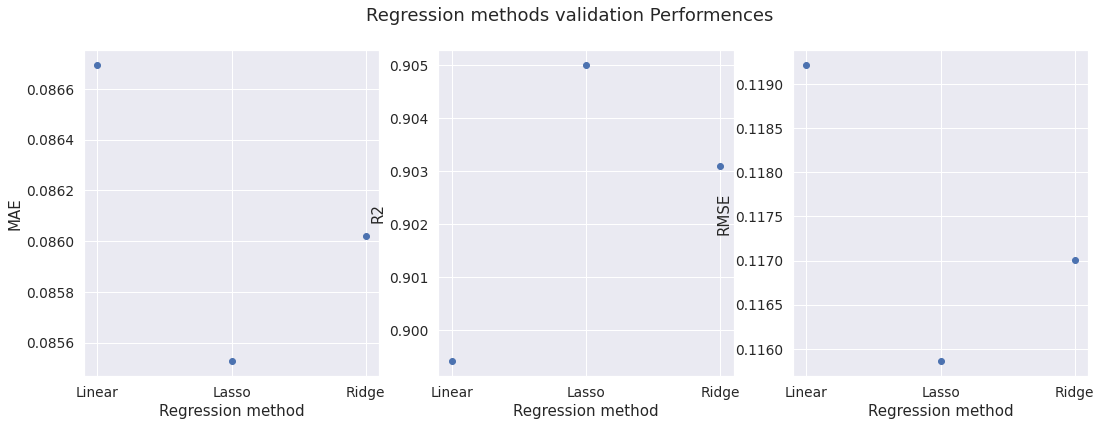

([0.08669443843118695, 0.08552595934688415, 0.0860188779880964],
 [0.8994101386523397, 0.904996263564483, 0.9030969594691121],
 [0.11921438380626495, 0.11585689808523379, 0.1170092661711532])

In [1168]:
evaluate_model(data_train=Xtrain, data_valid=Xvalid, target_train=ytrain, target_valid=yvalid, ifPrint=True)

Playing with the KNN imputation - will take onlr Ridge and Lasso regression



## 3.3 initialization function

Now, we will generelize all the Feature engineering we implemented to 'initialize_data' function in order to test different hyperparameters

In [1205]:
# Amit initialize function
import numpy as np
import pandas as pd
from scipy import stats

# param for later: impCat, impInt, impFloat, kCat = 10, kInt = 10, kFloat = 10
def initialize_data(impCat, impInt, impFloat, catEnc = 'Label'):
    train = pd.read_csv(main_path + '/train.csv')
    test = pd.read_csv(main_path + '/test.csv')
    
    ## missing values - remove samples
    train = Remove_all_ourliers(train)
    # test = Remove_all_ourliers(test)

    # indexing
    house_df = pd.concat([train,test],ignore_index = True, sort = False)
    tr_idx = house_df['SalePrice'].notnull()
    te_idx = [not elem for elem in tr_idx]
    te_idx = pd.Series(te_idx)

    X_train = house_df[tr_idx].drop(['SalePrice'], axis=1)
    # X_test = house_df[te_idx].drop(['SalePrice'], axis=1)


    ## missing features - remove features 
    X_df_drop = featureDrop(house_df, tr_idx, ifPrint=False)
    X_train_drop = X_df_drop[tr_idx]
    X_test_drop = X_df_drop[te_idx]
    Y_price = X_df_drop.SalePrice

    #colums
    categorical_cols = [cname for cname in X_df_drop.loc[:,:'SaleCondition'].columns if
                X_df_drop[cname].nunique() < 200 and 
                X_df_drop[cname].dtype == "object"]

    int_cols = [cname for cname in X_df_drop.loc[:,:'SaleCondition'].columns if 
                    X_df_drop[cname].dtype in ['int64']]

    float_cols = [cname for cname in X_df_drop.loc[:,:'SaleCondition'].columns if 
                    X_df_drop[cname].dtype in ['float64']]

    ## Categorical encoding
    if catEnc == 'Label':
      X_df_encode = Labaling_V2(X_df_drop)
    elif catEnc == 'Factorazie':
      X_df_encode = factorization(X_df_drop,categorical_cols)

    ## missing features - impute features
    I = Impute_class(X=X_df_encode)
    # categorical features
    if impCat == "KNN":
      I.impute_values(cols=categorical_cols, method= impCat, K=10)
    else: 
      I.impute_values(cols=categorical_cols, method= impCat)
    # int features
    if impInt == "KNN":
      I.impute_values(cols= int_cols, method= impInt, K=10)
    else:
      I.impute_values(cols= int_cols, method= impInt)
    # float features
    if impFloat == "KNN":
      I.impute_values(cols= float_cols, method= impFloat, K=10)
    else:
      I.impute_values(cols= float_cols, method= impFloat)
    X_df_impute2 = I.X

    ## Taking care of skewed target
    Y_price_log = np.log1p(Y_price)

    # Normalize
    X_norm = X_df_impute2
    # X_norm =  pd.DataFrame(stats.zscore(X_df_impute2))
    # X_norm.columns = X_df_impute2.columns

    # indexing
    X_train = X_norm[tr_idx].drop(['SalePrice'], axis=1)
    Y_train = Y_price_log[tr_idx]
    te_idx = [not elem for elem in tr_idx]
    te_idx = pd.Series(te_idx)
    X_test = X_norm[te_idx].drop(['SalePrice'], axis=1)


    # return X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx
    return X_train, Y_train, X_test


Linear Regression Model results:
performences over Train set:
MAE = 0.0824269914205873
R2 = 0.9160731232543953
RMSE = 0.11504325571214195


performences over Validation set:
MAE = 0.08669443843118695
R2 = 0.8994101386523397
RMSE = 0.11921438380626495


Lasso Regression Model results:
performences over Train set:
MAE = 0.0834409594747851
R2 = 0.9134412782488165
RMSE = 0.11683314032028212


performences over Validation set:
MAE = 0.08552595934688415
R2 = 0.904996263564483
RMSE = 0.11585689808523379


Ridge Kfold Regression Model results:
performences over Train set:
MAE = 0.08287511639965268
R2 = 0.9149974729721061
RMSE = 0.11577813550735681


performences over Validation set:
MAE = 0.0860188779880964
R2 = 0.9030969594691121
RMSE = 0.1170092661711532




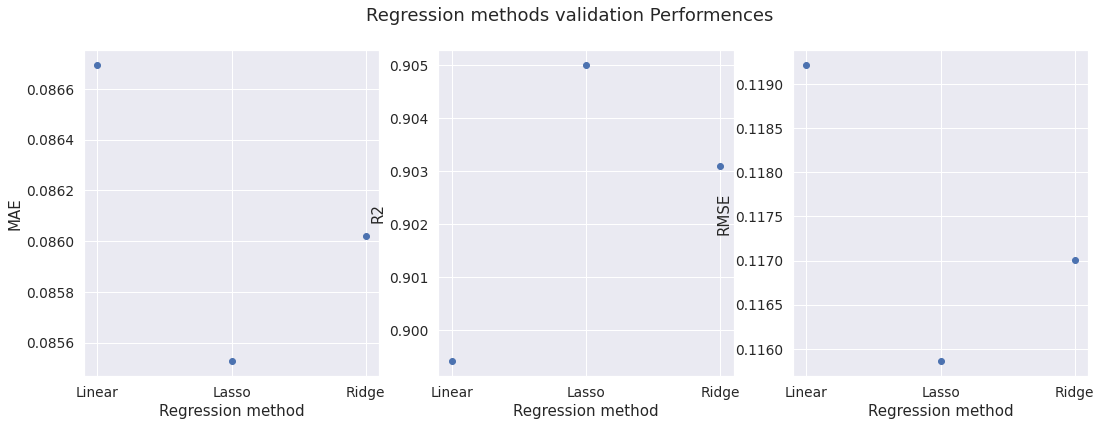

([0.08669443843118695, 0.08552595934688415, 0.0860188779880964],
 [0.8994101386523397, 0.904996263564483, 0.9030969594691121],
 [0.11921438380626495, 0.11585689808523379, 0.1170092661711532])

In [1199]:
# Data initialize
# x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
# Data split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
# Train and evaluate diffrent models
evaluate_model(data_train=Xtrain, data_valid=Xvalid, target_train=ytrain, target_valid=yvalid)

## 3.4 Hyperparameters

### 3.4.1 impute_method

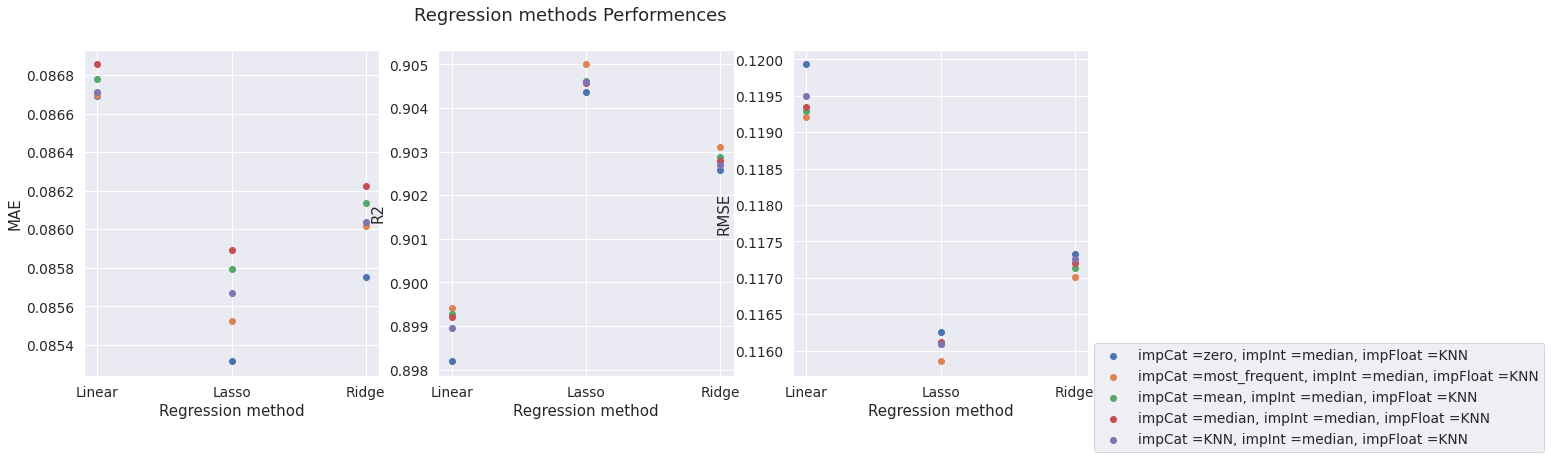

In [1195]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

impCat_vec = ["zero", "most_frequent", "mean", "median", "KNN"]
# impInt_vec = ["zero", "most_frequent", "mean", "median", "KNN"]
# impFloat_vec = ["zero", "most_frequent", "mean", "median", "KNN"]
impInt_vec = ["median"]
impFloat_vec = ["KNN"]

for impCat_item in impCat_vec:
  for impInt_item in impInt_vec:
    for impFloat_item in impFloat_vec:
      # Data initialize
      # x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
      x_train, y_train, x_test = initialize_data(impCat = impCat_item, impInt = impInt_item, impFloat = impFloat_item)
      # Data split
      Xtrain, Xvalid, ytrain, yvalid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
      # Train and evaluate diffrent models
      MAE_array_valid, R2_array_valid, RMSE_array_valid = evaluate_model(data_train=Xtrain, data_valid=Xvalid, target_train=ytrain, target_valid=yvalid, ifPrint=False)

      axs[0].scatter(["Linear","Lasso", "Ridge"], MAE_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))
      axs[1].scatter(["Linear","Lasso", "Ridge"], R2_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))
      axs[2].scatter(["Linear","Lasso", "Ridge"], RMSE_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))

axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='best', borderaxespad=0)
plt.show()

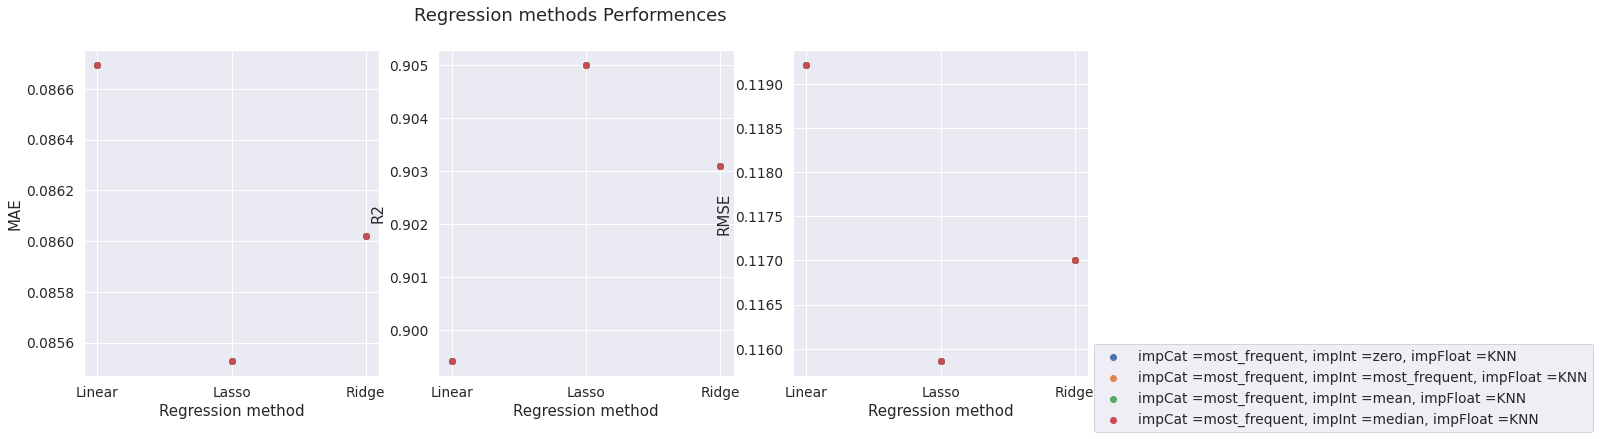

In [1196]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

impCat_vec = ["most_frequent"]
impInt_vec = ["zero", "most_frequent", "mean", "median", "KNN"]
# impFloat_vec = ["zero", "most_frequent", "mean", "median", "KNN"]
impFloat_vec = ["KNN"]

for impCat_item in impCat_vec:
  for impInt_item in impInt_vec:
    for impFloat_item in impFloat_vec:
      # Data initialize
      # x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
      x_train, y_train, x_test = initialize_data(impCat = impCat_item, impInt = impInt_item, impFloat = impFloat_item)
      # Data split
      Xtrain, Xvalid, ytrain, yvalid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
      # Train and evaluate diffrent models
      MAE_array_valid, R2_array_valid, RMSE_array_valid = evaluate_model(data_train=Xtrain, data_valid=Xvalid, target_train=ytrain, target_valid=yvalid, ifPrint=False)

      axs[0].scatter(["Linear","Lasso", "Ridge"], MAE_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))
      axs[1].scatter(["Linear","Lasso", "Ridge"], R2_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))
      axs[2].scatter(["Linear","Lasso", "Ridge"], RMSE_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))

axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='best', borderaxespad=0)
plt.show()

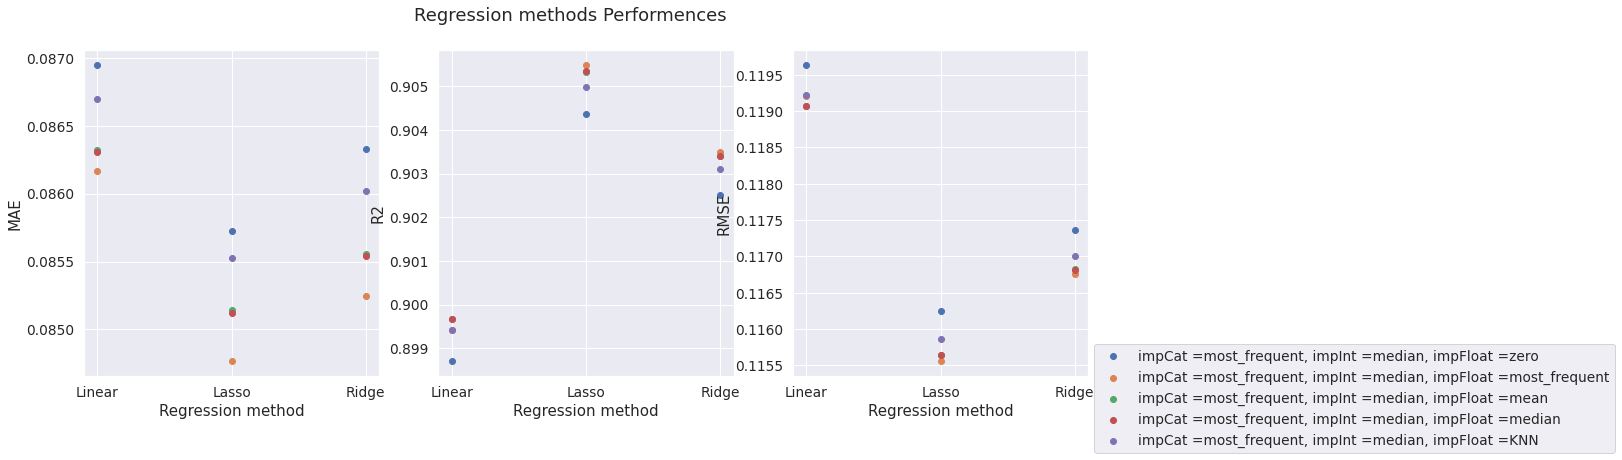

In [1197]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

impCat_vec = ["most_frequent"]
impInt_vec = ["median"]
impFloat_vec = ["zero", "most_frequent", "mean", "median", "KNN"]


for impCat_item in impCat_vec:
  for impInt_item in impInt_vec:
    for impFloat_item in impFloat_vec:
      # Data initialize
      # x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
      x_train, y_train, x_test = initialize_data(impCat = impCat_item, impInt = impInt_item, impFloat = impFloat_item)
      # Data split
      Xtrain, Xvalid, ytrain, yvalid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
      # Train and evaluate diffrent models
      MAE_array_valid, R2_array_valid, RMSE_array_valid = evaluate_model(data_train=Xtrain, data_valid=Xvalid, target_train=ytrain, target_valid=yvalid, ifPrint=False)

      axs[0].scatter(["Linear","Lasso", "Ridge"], MAE_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))
      axs[1].scatter(["Linear","Lasso", "Ridge"], R2_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))
      axs[2].scatter(["Linear","Lasso", "Ridge"], RMSE_array_valid, label ="impCat ={}, impInt ={}, impFloat ={}".format(impCat_item,impInt_item,impFloat_item))

axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='best', borderaxespad=0)
plt.show()

The best impute methods are: 
* **Categorical features** - most_frequent
* **Int features** - there is no different
* **Float features** - most_frequent

### 3.4.2 Categorical encoding

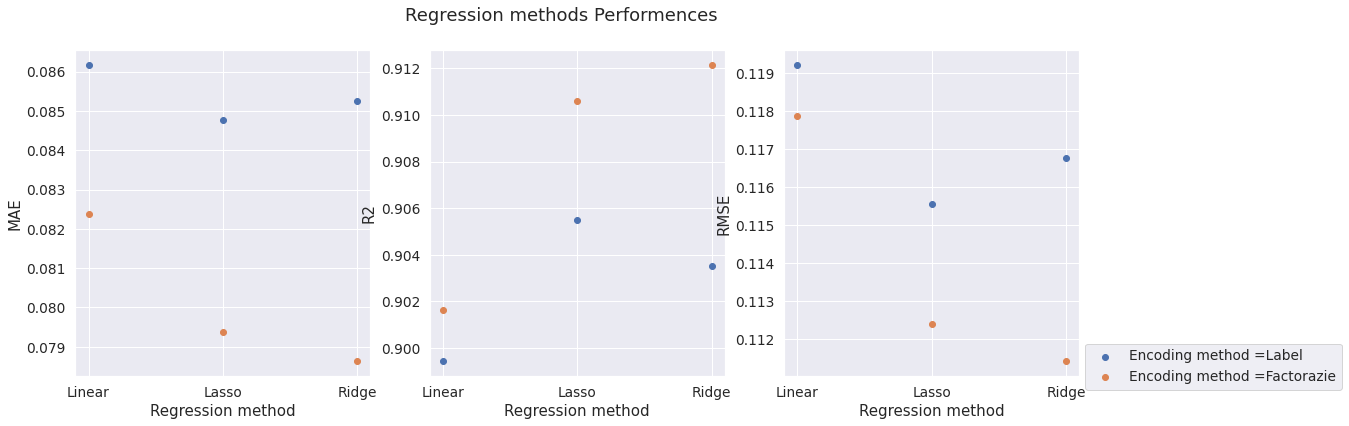

In [1201]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

Encoding_methods = ["Label","Factorazie"]


for enc in Encoding_methods:
  # Data initialize
  # x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
  x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "most_frequent", catEnc = enc)
  # Data split
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
  # Train and evaluate diffrent models
  MAE_array_valid, R2_array_valid, RMSE_array_valid = evaluate_model(data_train=Xtrain, data_valid=Xvalid, target_train=ytrain, target_valid=yvalid, ifPrint=False)

  axs[0].scatter(["Linear","Lasso", "Ridge"], MAE_array_valid, label ="Encoding method ={}".format(enc))
  axs[1].scatter(["Linear","Lasso", "Ridge"], R2_array_valid, label ="Encoding method ={}".format(enc))
  axs[2].scatter(["Linear","Lasso", "Ridge"], RMSE_array_valid, label ="Encoding method ={}".format(enc))

axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='best', borderaxespad=0)
plt.show()

Linear Regression Model results:
performences over Train set:
MAE = 0.08255544182597103
R2 = 0.9125540297910336
RMSE = 0.11743039810646592


performences over Validation set:
MAE = 0.08238633912445464
R2 = 0.9016545412816629
RMSE = 0.11787690075806885


Lasso Regression Model results:
performences over Train set:
MAE = 0.08330754115171168
R2 = 0.9098333830214423
RMSE = 0.11924317210491024


performences over Validation set:
MAE = 0.07937178350587012
R2 = 0.9105890585141299
RMSE = 0.11239497306377999


Ridge Kfold Regression Model results:
performences over Train set:
MAE = 0.08334533436236623
R2 = 0.9081492577263243
RMSE = 0.12035162764152962


performences over Validation set:
MAE = 0.07862716404663246
R2 = 0.9121424914928875
RMSE = 0.11141431518499827




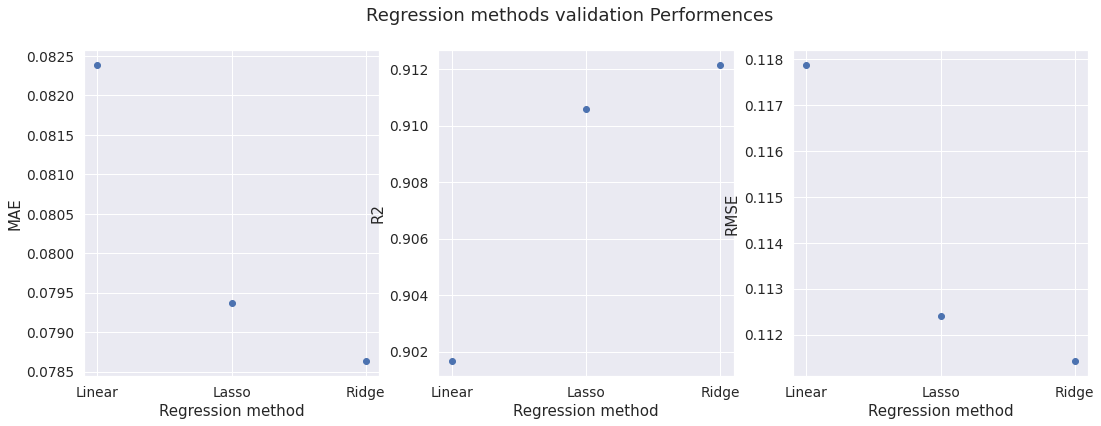

([0.08238633912445464, 0.07937178350587012, 0.07862716404663246],
 [0.9016545412816629, 0.9105890585141299, 0.9121424914928875],
 [0.11787690075806885, 0.11239497306377999, 0.11141431518499827])

In [1206]:
# Data initialize
# x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "most_frequent", catEnc = "Factorazie")
# Data split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
# Train and evaluate diffrent models
evaluate_model(data_train=Xtrain, data_valid=Xvalid, target_train=ytrain, target_valid=yvalid)

## 4. Section 4: Submission

In [958]:
# Feature engineering
x_train, y_train, x_test = initialize_data(impCat = "most_frequent", impInt = "median", impFloat = "KNN")
# Data split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
# Model implemantion
R = Regression_model(Xtrain, ytrain)
R.Linear_reg()
# prediction
pred_test = R.model.predict(x_test)
# target correction
target = np.expm1(pred_test)

# make submission dataframe
test = pd.read_csv(main_path + '/test.csv')
submission =  pd.DataFrame(test['Id'])
submission['SalePrice'] = target
print(submission)

# save to csv
# ...

        Id      SalePrice
0     1461  115187.644853
1     1462  156994.671204
2     1463  173104.998805
3     1464  193464.490255
4     1465  181201.734828
...    ...            ...
1454  2915   99048.499016
1455  2916   83885.950534
1456  2917  162238.458286
1457  2918  123474.247316
1458  2919  242448.665259

[1459 rows x 2 columns]


### ++++++++++

In [ ]:
# Dor initialize function
"""
import numpy as np
import pandas as pd
def initialize_data():
    train = pd.read_csv(main_path + '/train.csv')
    test = pd.read_csv(main_path + '/test.csv')
    house_df = pd.concat([train,test],ignore_index = True, sort = False)
    tr_idx = house_df['SalePrice'].notnull()
    te_idx = [not elem for elem in tr_idx]
    te_idx = pd.Series(te_idx)
    # pd.reset_option('all')
    
    # Dropping columns with higher missimg data rate
    missing_data = [col for col in train.columns if (train[col].isnull().sum() / train.shape[0]) * 100 > 50]
    house_df = house_df.drop(missing_data, axis=1)

    # Taking care of skewed target
    house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
    train = house_df[tr_idx]
    test = house_df[tr_idx]
  
    # Taking care of Outliers
    train = Remove_all_ourliers(train)

    house_df = pd.concat([train,test],ignore_index = True, sort = False)
    tr_idx = house_df['SalePrice'].notnull()

    # factorize
    categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 200 and 
                    house_df[cname].dtype == "object"]

    house_df = Labaling(house_df, categorical_cols)
    X_train = house_df[tr_idx].drop(['SalePrice'], axis=1)
    Y_train = house_df[tr_idx].SalePrice
    te_idx = [not elem for elem in tr_idx]
    te_idx = pd.Series(te_idx)
    X_test = house_df[te_idx]
    Y_test = house_df[te_idx].SalePrice
    
    return X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx
"""

K = 2


ValueError: ignored

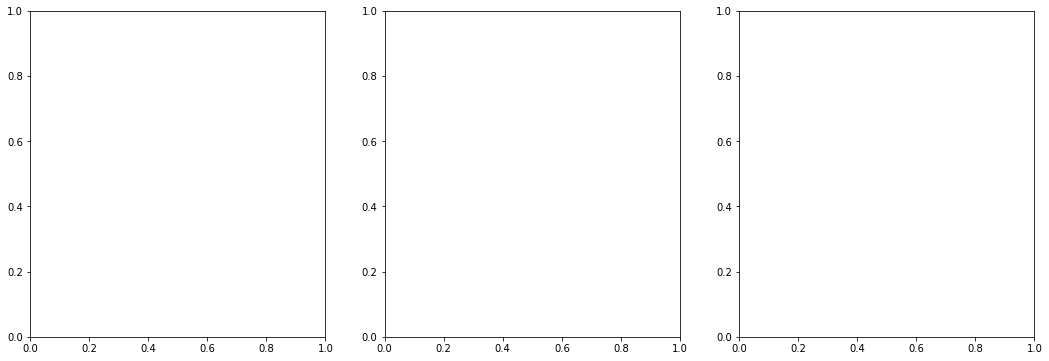

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  # X, Y_train, X_test, Y_test = initialize_data("most_frequent", "KNN", "KNN",K_it, K_it, K_it)
  X_1, Y_train, X_test, Y_test = initialize_data(impCat = "most_frequent", impInt = "KNN", impFloat = "KNN", Kcat = K_it, Kint = K_it, Kfloat = K_it)
  # I = Impute_class(X)
  # I.impute_values(cols=categorical_cols, method= "KNN",K=K_it)
  # I.impute_values(cols=int_cols, method= "KNN",K=K_it)
  # I.impute_values(cols=float_cols, method= "KNN",K=K_it)
  # X = I.X
  # # normalize features
  # X_norm =  pd.DataFrame(stats.zscore(X_1))
  # X_norm.columns = X_1.columns

  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_1, Y_train, test_size = 0.3, random_state = 0)
  R = Regression_model(Xtrain, ytrain)
  MAE_array_train = []
  MAE_array_valid = []
  R2_array_train = []
  R2_array_valid = []
  RMSE_array_train = []
  RMSE_array_valid = []
  print("K = {}".format(K_it))
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  R.RidgeKfold_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  axs[0].scatter(["Lasso", "Ridge"], MAE_array_valid, label ="K ={}".format(K_it))
  axs[1].scatter(["Lasso", "Ridge"], R2_array_valid, label ="K ={}".format(K_it))
  axs[2].scatter(["Lasso", "Ridge"], RMSE_array_valid, label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.legend()
plt.show()

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
MAE = 0.09404245619268074
R2 = 0.7875432570245198
RMSE = 0.18118096331326553
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
MAE = 0.09394367857693099
R2 = 0.7873660090605743
RMSE = 0.18125652519283864
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
MAE = 0.09389644534120263
R2 = 0.7875059667105597
RMSE = 0.18119686301706273
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
MAE = 0.09393680885497283
R2 = 0.7873031974135558
RMSE = 0.18128329461990927
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
MAE = 0.09392624900781817
R2 = 0.7875240442392845
RMSE = 0.1811891553626066
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
MAE = 0.0939350540898755
R2 = 0.787218147984902
RMSE = 0.18131953517331506
K = 14
MAE = 0.09202575264933834
R2 = 0.799

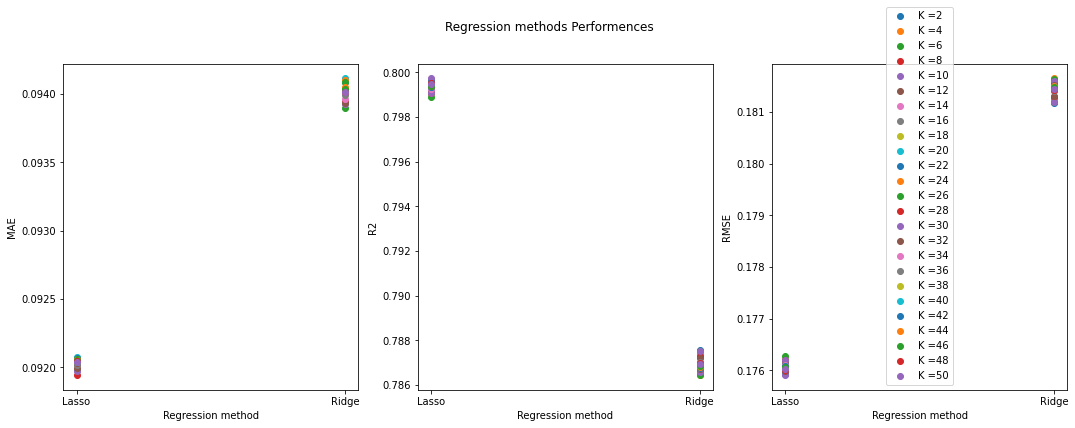

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X, Y_train, X_test, Y_test = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K=K_it)
  I.impute_values(cols=int_cols, method= "KNN",K=K_it)
  I.impute_values(cols=float_cols, method= "KNN",K=K_it)
  X = I.X
  # normalize features
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  R = Regression_model(Xtrain, ytrain)
  MAE_array_train = []
  MAE_array_valid = []
  R2_array_train = []
  R2_array_valid = []
  RMSE_array_train = []
  RMSE_array_valid = []
  print("K = {}".format(K_it))
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  R.RidgeKfold_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  axs[0].scatter(["Lasso", "Ridge"], MAE_array_valid, label ="K ={}".format(K_it))
  axs[1].scatter(["Lasso", "Ridge"], R2_array_valid, label ="K ={}".format(K_it))
  axs[2].scatter(["Lasso", "Ridge"], RMSE_array_valid, label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.legend()
plt.show()

We can notice that Lasso regression performes way better than Ridge Regression

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 3
MAE = 0.09200235969442769
R2 = 0.7995373839396974
RMSE = 0.17599243557441938
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
K = 5
MAE = 0.09202512332857554
R2 = 0.7989061175581715
RMSE = 0.17626932206899182
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
K = 7
MAE = 0.0919680022691085
R2 = 0.7992943002417916
RMSE = 0.17609910865782935
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
K = 9
MAE = 0.09195716154669221
R2 = 0.799453094795799
RMSE = 0.17602943173109775
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
K = 11
MAE = 0.0919953482514024
R2 = 0.7993813256398205
RMSE = 0.1760609264920235
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
K = 13


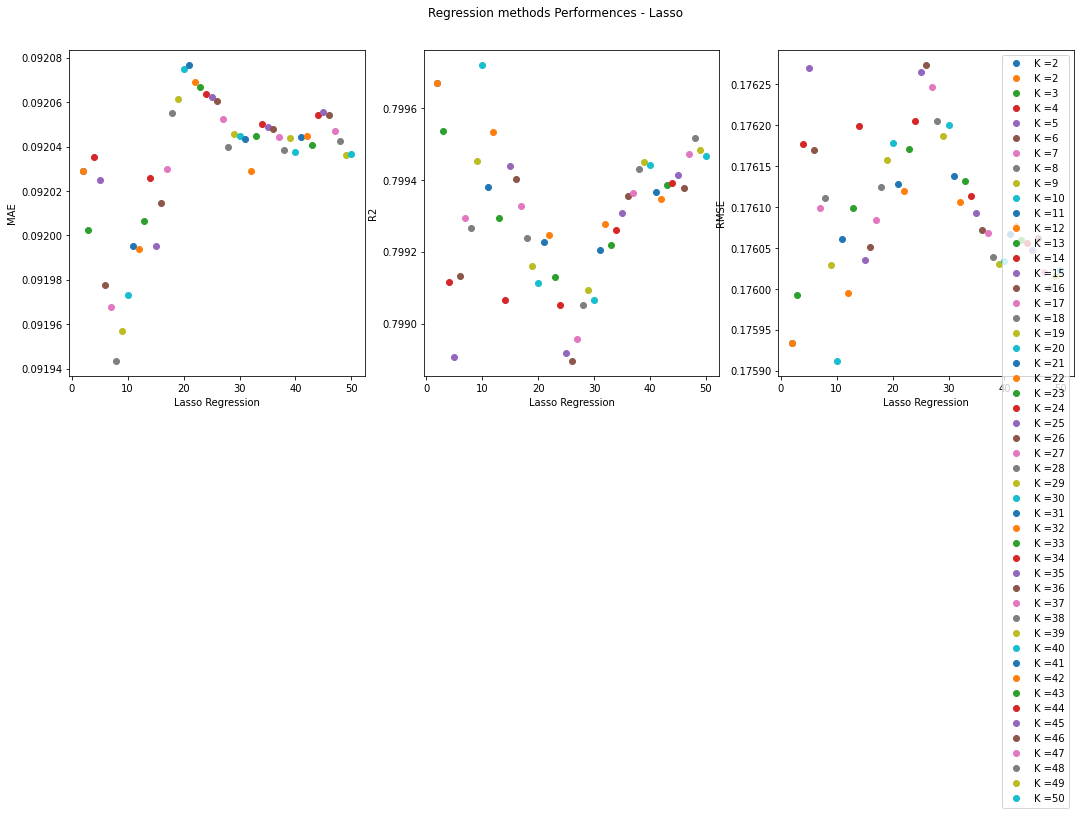

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,50, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K= K_it)
  I.impute_values(cols=int_cols, method= "KNN",K= K_it)
  I.impute_values(cols=float_cols, method= "KNN",K= K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  R = Regression_model(Xtrain, ytrain)
  print("K = {}".format(K_it))
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Lasso Regression")
axs[1].set_xlabel("Lasso Regression")
axs[2].set_xlabel("Lasso Regression")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937


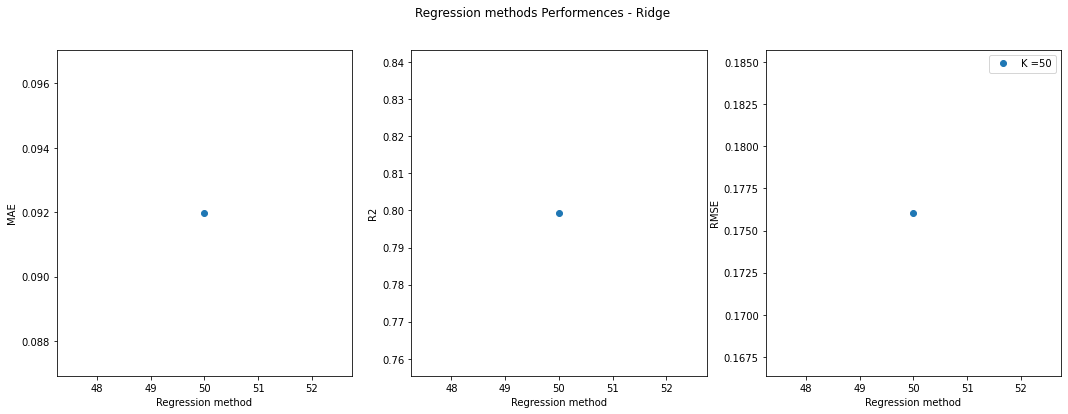

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
X = initialize_data(train, test, categorical_cols)
I = Impute_class(X)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols=int_cols, method= "mean")
I.impute_values(cols=float_cols, method= "median",)
X = I.X
X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
X_train_imp_norm.columns = X.columns
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)
MAE_array_valid.append(Score[0])
R2_array_valid.append(Score[1])
RMSE_array_valid.append(Score[2])
axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Ridge')
# plt.legend()
plt.show()

K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375

K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104

No KNN:
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937

best resukts given by using K = 10

*Only Categorical Variabels using KNN:*



K = 2
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 4
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 6
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 8
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 10
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 12
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 14
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 16
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 18
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 20
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 22
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 24
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589

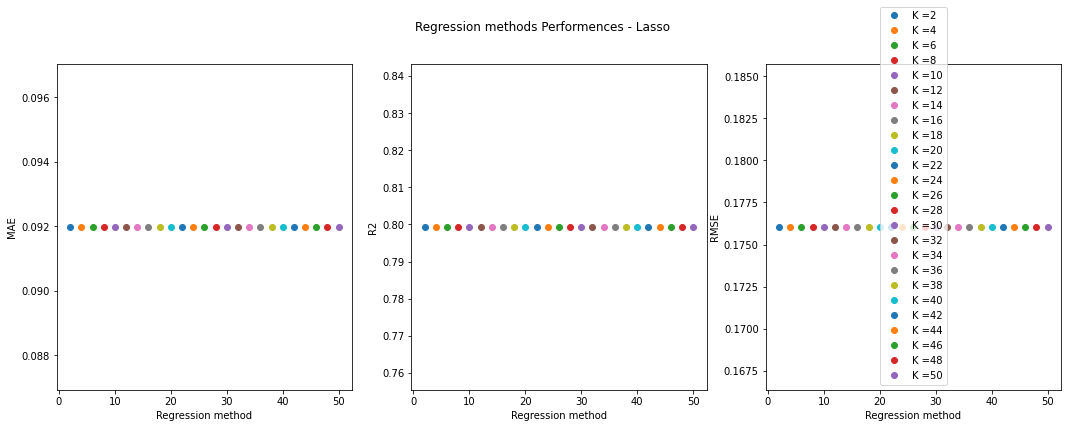

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K= K_it)
  I.impute_values(cols=int_cols, method= "mean")
  I.impute_values(cols=float_cols, method= "median")
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

*Only int Variabels using KNN:*

K = 2
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 4
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 6
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 8
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 10
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 12
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 14
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 16
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 18
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 20
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 22
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 24
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589

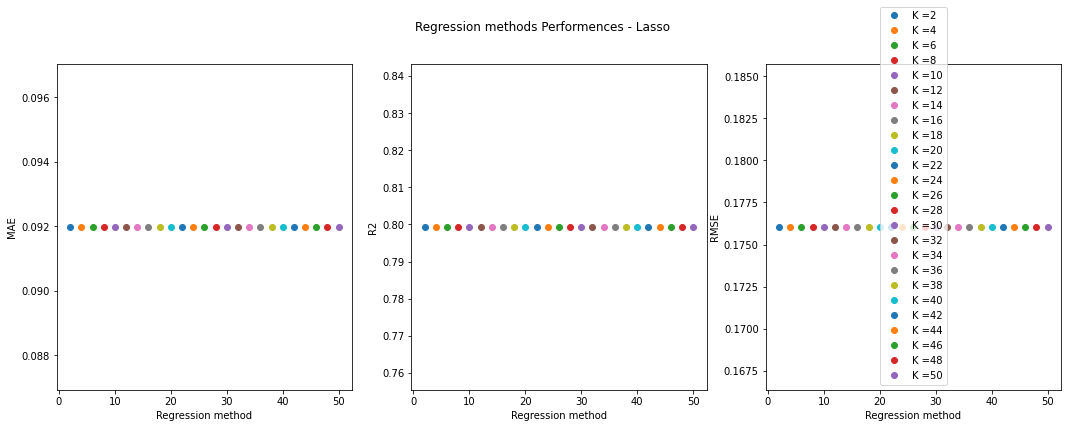

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols=int_cols, method= "KNN",K= K_it)
  I.impute_values(cols=float_cols, method= "median")
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

*Only float Variabels using KNN:*

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
K = 14
MAE = 0.09202575264933834
R2 = 0.7990663511064717
RMSE = 0.17619908152473507
K = 16
MAE = 0.0920144802457741
R2 = 0.7994038801803032
RMSE = 0.17605102939515047
K = 18
MAE = 0.09205530586097103
R2 = 0.7992379615228599
RMSE = 0.17612382270946964
K = 20
MAE = 0.09207508224109995
R2 = 0.7991127717574072
RMSE = 0.1761787271725345
K = 22
MAE = 0.09206900632277903
R2 = 0.7992473794173427
RMSE = 0.17611969161216628
K = 24
MAE = 0.09206357900304009
R2 = 0.7990517548920011
RMSE = 0.1762054811320021
K

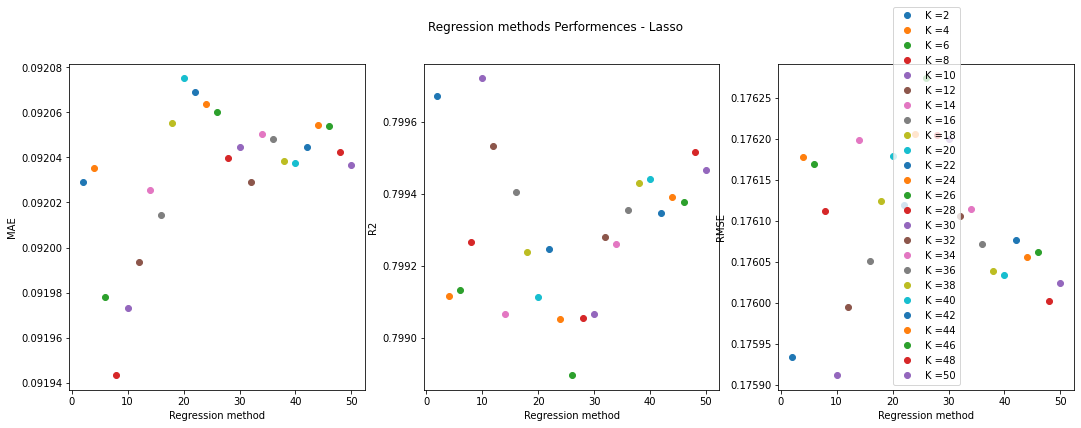

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols=int_cols, method= "mean")
  I.impute_values(cols=float_cols, method= "KNN",K= K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
K = 14
MAE = 0.09202575264933834
R2 = 0.7990663511064717
RMSE = 0.17619908152473507
K = 16
MAE = 0.0920144802457741
R2 = 0.7994038801803032
RMSE = 0.17605102939515047
K = 18
MAE = 0.09205530586097103
R2 = 0.7992379615228599
RMSE = 0.17612382270946964
K = 20
MAE = 0.09207508224109995
R2 = 0.7991127717574072
RMSE = 0.1761787271725345
K = 22
MAE = 0.09206900632277903
R2 = 0.7992473794173427
RMSE = 0.17611969161216628
K = 24
MAE = 0.09206357900304009
R2 = 0.7990517548920011
RMSE = 0.1762054811320021
K

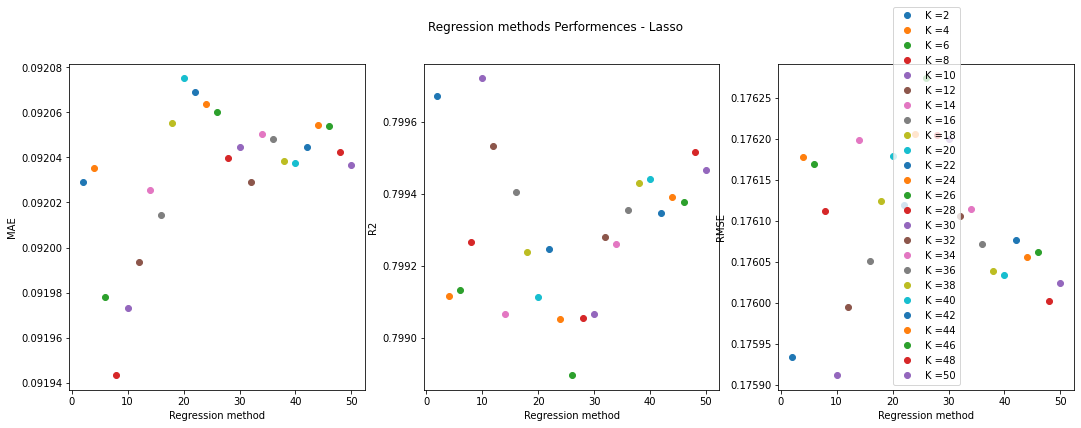

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K= K_it)
  I.impute_values(cols=int_cols, method= "KNN",K= K_it)
  I.impute_values(cols=float_cols, method= "KNN",K= K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

**Categorical Value:**

MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937


**Int Values:**

MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937

**float Values:**

K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104

K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375

**all KNN:**

K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104

K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375



**We can notice that applying KNN imputing is beneficail only when applied on float represented Variabels, and performs better then not using KNN at all *

In [ ]:
house_df.iloc[705]

Id                   706
MSSubClass           190
MSZoning              RM
LotFrontage           70
LotArea             5600
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood      IDOTRR
Condition1          Norm
Condition2          Norm
BldgType          2fmCon
HouseStyle        2Story
OverallQual            4
OverallCond            5
YearBuilt           1930
YearRemodAdd        1950
RoofStyle            Hip
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      Wd Shng
MasVnrType          None
MasVnrArea             0
ExterQual             Fa
ExterCond             Fa
Foundation          Slab
BsmtQual             NaN
BsmtCond             NaN
BsmtExposure         NaN
BsmtFinType1         NaN
BsmtFinSF1             0
BsmtFinType2         NaN
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating             GasA


### 3.2.2 Label Encoding vs Factorization 


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 2
MAE = 0.09119039981738267
R2 = 0.8063326737781068
RMSE = 0.17298381988098666

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 4
MAE = 0.0911172706739835
R2 = 0.8059395219575465
RMSE = 0.17315931263157777

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 6
MAE = 0.09111166582251888
R2 = 0.8059279304860831
RMSE = 0.17316448406390503

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 8
MAE = 0.09109880914722275
R2 = 0.8061179460619396
RMSE = 0.1730796908032552

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 10
MAE = 0.09113030833080774
R2 = 0.

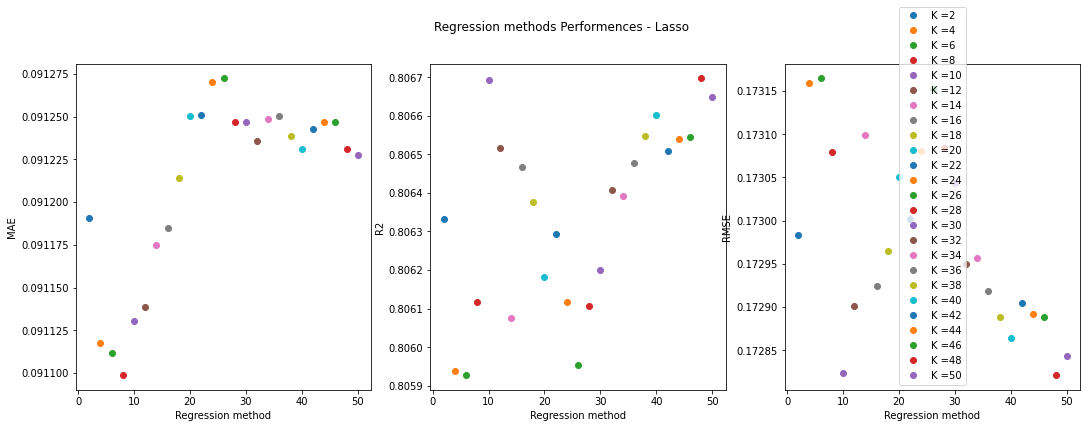

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
MAE_array_train = []
MAE_array_valid = []
R2_array_train = []
R2_array_valid = []
RMSE_array_train = []
RMSE_array_valid = []
for K_it in np.linspace(2,50,25, dtype= int):
  X, Y_train, X_test, Y_test = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols= int_cols, method= "median")
  I.impute_values(cols= float_cols, method= "KNN", K=K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))

  # Score = R.score_dataset(X_test, Y_test)
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

Similarly, Best performences given by setting K =10. 

The main difference between Factorize and label encoding is that label encoding sets the Major class in each categorical value to be the highest numerical value and the minor to be 0, in contrast to factorization which does the opposite!

Factorize Encoding Results:

MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375

Label Encoding Results:

MAE = 0.09113030833080774
R2 = 0.8066921745407033
RMSE = 0.17282319211095384


### Adding Outliers removal

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
# print(X)
I = Impute_class(X_train)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=10)
X_train = I.X
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", Xvalid.shape)
print("Y_test", yvalid.shape)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)

X_train (2903, 76)
Y_train (2903,)
X_test (871, 76)
Y_test (871,)
MAE = 0.08844451795717097
R2 = 0.9056664920205629
RMSE = 0.12468541165124385


In [ ]:
ytrain = pd.Series(ytrain)
ytrain.isna()

30

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
# print(X)
I = Impute_class(X_train)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=10)
X_train = I.X
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", Xvalid.shape)
print("Y_test", yvalid.shape)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)

X_train (2903, 76)
Y_train (2903,)
X_test (871, 76)
Y_test (871,)
MAE = 0.08844451795717097
R2 = 0.9056664920205629
RMSE = 0.12468541165124385


K = 2
MAE = 0.08866021995863446
R2 = 0.9072240841915343
RMSE = 0.12365175253274097
K = 4
MAE = 0.08874380358603727
R2 = 0.9073959587847078
RMSE = 0.12353716219630897
K = 6
MAE = 0.08878919982573596
R2 = 0.9073537723726158
RMSE = 0.12356529809705326
K = 8
MAE = 0.08876907069288038
R2 = 0.9072804252741588
RMSE = 0.12361420112972119
K = 10
MAE = 0.0887868805439725
R2 = 0.9072897247399168
RMSE = 0.12360800192712904
K = 12
MAE = 0.08878802888629693
R2 = 0.9072869825896273
RMSE = 0.12360982992953229
K = 14
MAE = 0.08878141598878174
R2 = 0.9072733474539734
RMSE = 0.1236189191323343
K = 16
MAE = 0.08878117682142761
R2 = 0.9072740798474771
RMSE = 0.12361843093466085
K = 18
MAE = 0.08878041555739727
R2 = 0.9072276373464271
RMSE = 0.12364938468742041
K = 20
MAE = 0.08878601192276325
R2 = 0.9072214919436421
RMSE = 0.12365347999483653
K = 22
MAE = 0.08878480345170892
R2 = 0.9072586112563826
RMSE = 0.12362874155338897
K = 24
MAE = 0.08877654878847674
R2 = 0.9072638219377801
RMSE = 0.1236252684598692

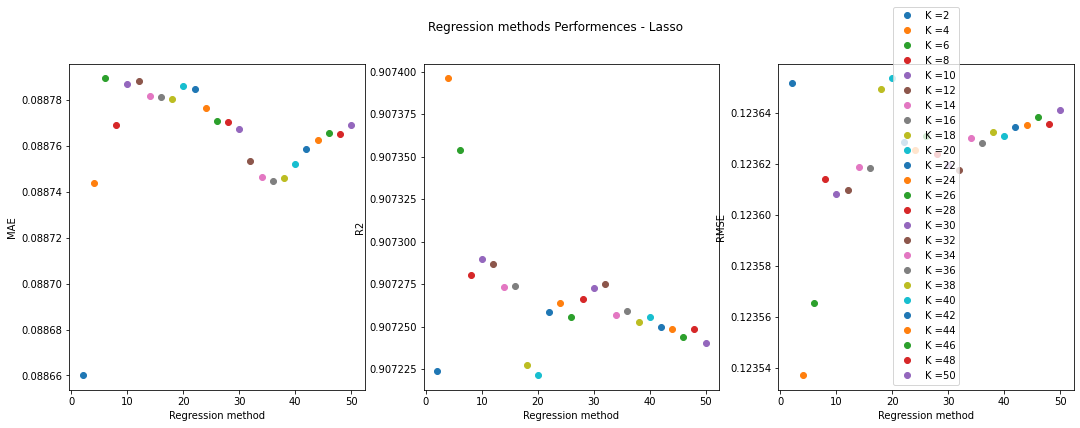

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
fig, axs = plt.subplots(1, 3, figsize=(36, 12), sharey=False)
MAE_array_train = []
MAE_array_valid = []
R2_array_train = []
R2_array_valid = []
RMSE_array_train = []
RMSE_array_valid = []
for K_it in np.linspace(2,50,25, dtype= int):

  X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
  # print(X)
  I = Impute_class(X_train)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols= int_cols, method= "median")
  I.impute_values(cols= float_cols, method= "KNN", K=K_it)
  X_train = I.X
  X_train =  pd.DataFrame(stats.zscore(X_train))
  X_train.columns = X_train.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))

  # Score = R.score_dataset(X_test, Y_test)
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

After Outliers removal, best result given cy choosing K = 4

K = 4

MAE = 0.08874380358603727
R2 = 0.9073959587847078
RMSE = 0.12353716219630897

In [ ]:
from scipy import stats
# Using Label Encoding in order to mess with Categorical Values
X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
# print(X)
I = Impute_class(X_train)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=4)
X_train = I.X
X_train = pd.DataFrame(stats.zscore(X_train))
X_train.columns = X_train.columns
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", Xvalid.shape)
print("Y_test", yvalid.shape)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)
Score = R.score_dataset(Xvalid, yvalid)

X_train (2903, 76)
Y_train (2903,)
X_test (871, 76)
Y_test (871,)
MAE = 0.08874380358603727
R2 = 0.9073959587847078
RMSE = 0.12353716219630897
